<a href="https://colab.research.google.com/github/yraj1996/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_ML_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### ** Individual name - Yash raj

# **Project Summary -**

This Project aims to predict the demand for bike sharing services in Seoul, South Korea. Bike sharing services have become increasingly popular in recent years, providing an affordable and environmental friendly way to get around the city. However, bike sharing companies often struggle with balancing their inventory of bikes at each station, as demand for bikes can fluctuate greatly throughout the day.

To address this issue, the Seoul Metropolitan Government has provided data on the city's bike sharing system, including information on weather, time of day, and the number of bikes rented. This data has been used to build a machine learning model that predicts the number of bikes that will be rented at any given time.

It is simple linear regression project. Linear regression is one of the most basic types of regression in supervised machine learning. The linear regression model consists of apredictor variable and a dependent variable related linearly to each other. We try to find the relationship between independent variable
(input) and a corresponding dependent variable (output).

The project was divided into several stages.

* The first stage involved data inspection which included looking for missing values and duplicate values. 

* The next stage involved exploratory data analysis, where trends and patterns in the data were identified. Distribution of data was also studied. 

* Hypothesis Testing was performed on two hypothesis. 
* After this Feature selection and Preprocessing of data was done by converting categorical variables into numerical ones, splitting data and data scaling .

* Furthur, various machine learning algorithms were tested on the split data that is trainig and test dataset, including Linear regression, Lasso regression, Ridge regression and Random forests classifier. 
* The performance of each model was evaluated using metrics such as root mean squared error and mean absolute error and R squared. The Random forests classifier model was found to be the most accurate.

Overall, the Seoul Bike Sharing Demand Prediction Project demonstrates the power of machine learning in predicting demand for bike sharing services. By accurately predicting demand, bike sharing companies can optimize their inventory and provide better service to their customers.

# **GitHub Link -**

https://github.com/yraj1996/Bike-Sharing-Demand-Prediction

https://nbviewer.org/github/yraj1996/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_ML_Regression.ipynb

If github doesnt shows this ipynb file in correct format, use  link to view this notebook in proper fromat.

# **Problem Statement**


**Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# importing libraries for analysis
import numpy as np
from numpy import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#importing libraries for hypothesis testing
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.weightstats import ztest

#importing libraries for preprocessing and ML Implementation.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

bike_df=pd.read_csv('/content/drive/MyDrive/ALMA BETTER Capstone Project/Bike Sharing Demand/SeoulBikeData.csv',encoding ='unicode_escape')

Mounted at /content/drive


We named our dataset as bike_df. 

### Dataset First View

In [ ]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
#last 5 rows of dataset
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

Here, we are looking at first view of dataset by using 'dataframe.head' and 'dataframe.tail' function.

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

There are 8760 rows and 14 columns.

### Dataset Information

In [ ]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From bike_df.info we can understand about features and  their data types

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
bike_df.duplicated().sum()

0

There is no duplicate value in dataset.

#### Missing Values/Null Values

In [ ]:
#null values in dataset
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### What did you know about your dataset?

Our dataset contains 8760 rows and 14 columns.

No null value is present in the datset.

No duplicate observations were present in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
# going to look at columns we have in dataset
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
bike_df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

dataframe.describe gives some statistical information of numerical features in dataset. 

### Variables Description 

Date : year-month-day

Rented Bike count - Count of bikes rented at each hour

Hour - Hour of the day

Temperature- Temperature in Celsius

Humidity - Humidity in %

Windspeed - Windspeed in m/s

Visibility - Visible distance in multiple of 10m

Dew point temperature - Celsius

Solar radiation - Radiation of sun in MJ/m2

Rainfall - Rainfall in mm

Snowfall - Snowfall in cm

Seasons - Winter, Spring, Summer, Autumn

Holiday - Holiday/No holiday

Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
bike_df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Changing the columns name fo further analysis.
bike_df=bike_df.rename(columns={'Rented Bike Count':'Rented_bike_count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation', 
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [ ]:
#converting date column to datetime format
bike_df['Date'] = pd.to_datetime(bike_df['Date'], format="%d/%m/%Y", infer_datetime_format='%d%m%Y', exact=True)


In [ ]:
# split day of week, month and year in three column
bike_df['day_of_week'] = bike_df['Date'].dt.day_name()   # extract week name from Date column
bike_df["month"] = bike_df['Date'].dt.month_name()       # extract month name from Date column
bike_df["year"] = bike_df['Date'].map(lambda x: x.year).astype("object")

In [ ]:
#new column that indicates whether each row corresponds to a weekday or a weekend:
bike_df['weekday'] = bike_df['Date'].dt.weekday < 5

In [ ]:
#convert string attributes Funtioning_Day to numerical values(binary value).
bike_df['Functioning_Day'] = bike_df['Functioning_Day'].apply(lambda x:1 if x=='Yes' else 0)


In [ ]:
#convert string attributes Holiday to numerical values(Binary).
bike_df['Holiday'] = bike_df['Holiday'].apply(lambda x:1 if x=='Holiday' else 0)

In [ ]:
bike_df['Holiday'].value_counts()

0    8328
1     432
Name: Holiday, dtype: int64

In [ ]:
bike_df['Functioning_Day'].value_counts()

1    8465
0     295
Name: Functioning_Day, dtype: int64

In [ ]:
bike_df['weekday'].value_counts()

True     6264
False    2496
Name: weekday, dtype: int64

In [ ]:
bike_df.head()

Date  Rented_bike_count  Hour  Temperature  Humidity  wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons  Holiday  Functioning_Day day_of_week     month  year  weekday  
0  Winter        0                1      Friday  December  2017     True  
1  Winter        0                1      Friday  December  2017     True  
2  Winter        0                1      Friday  December  2017     True  
3  Winter        0                1      Friday  December  2017     True  
4  Winter        0                1      Friday  December  2017     True

### What all manipulations have you done and insights you found?

Converted "Functionioning Day" column values to binary values.

Converted "Holiday" column values to binary values.

Converted "Date" column to Datetime format.

Extracted Day of week, Month, Year from date to make separate features.

Introduced a column "weekday" that represents whether there was a weekend or weekday on respective date.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Univariate Analysis

#### Chart - 1- Histogram on target variable 

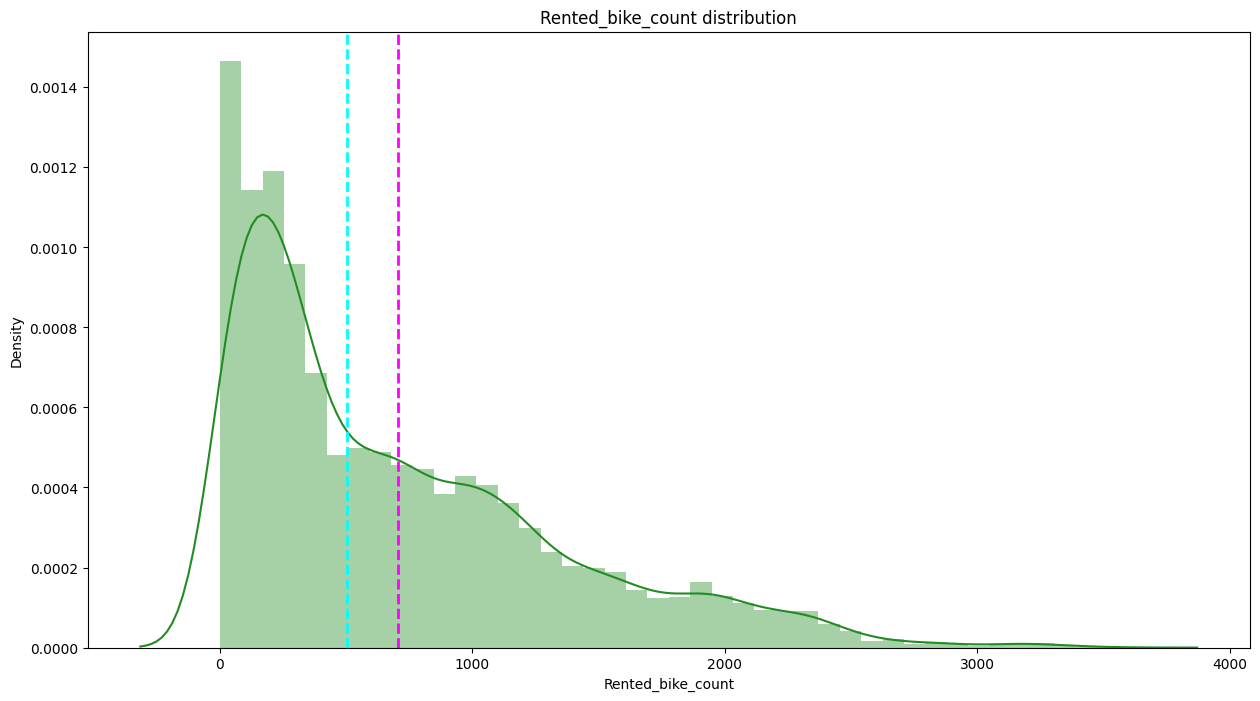

In [ ]:
#Disribution of target variable
plt.figure(figsize=(15,8))
sns.distplot(bike_df['Rented_bike_count'],color='forestgreen')
plt.xlabel('Rented_bike_count')
plt.title('Rented_bike_count distribution')
plt.axvline(bike_df['Rented_bike_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(bike_df['Rented_bike_count'].median(), color='cyan', linestyle='dashed', linewidth=2)


##### 1. Why did you pick the specific chart?

A Distplot or distribution plot, depicts the variation in the data distribution.It is used basically for univariant set of observations and visualizes that is through a histogram. So, i used distplot to see distribution of dependent variable. 

##### 2. What is/are the insight(s) found from the chart?

* Dependent variable distribution is slightly right skewed.
* Maximum frequency of rented bike count were of values less than 500
* Median lies around 500 and 75 percentile lies around 1000.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Just a histogram cannot define business impact. It's done just to see the distribution of the column data over the dataset.

#### Chart - 2 - Distribution of Independent Variables 

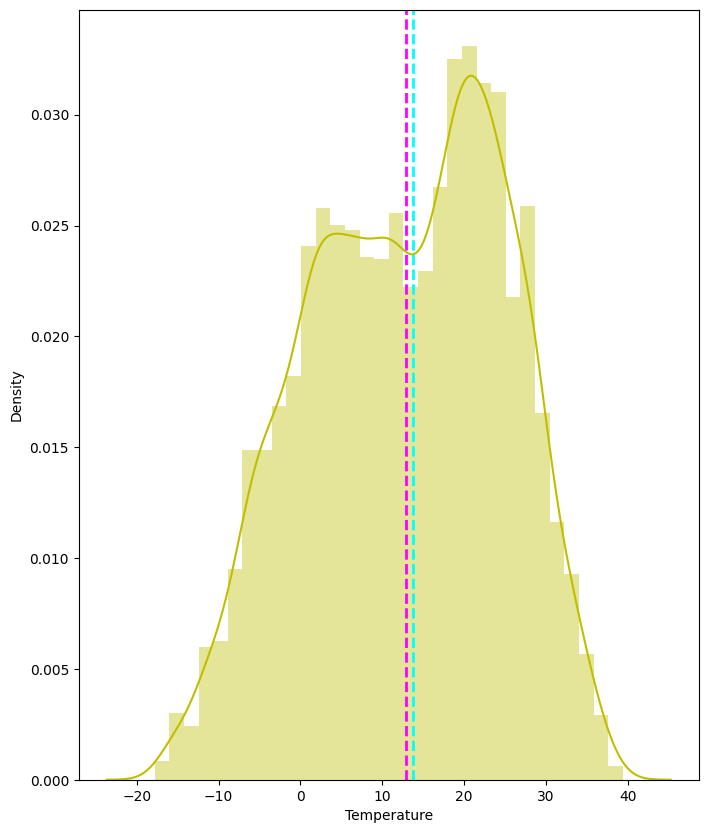

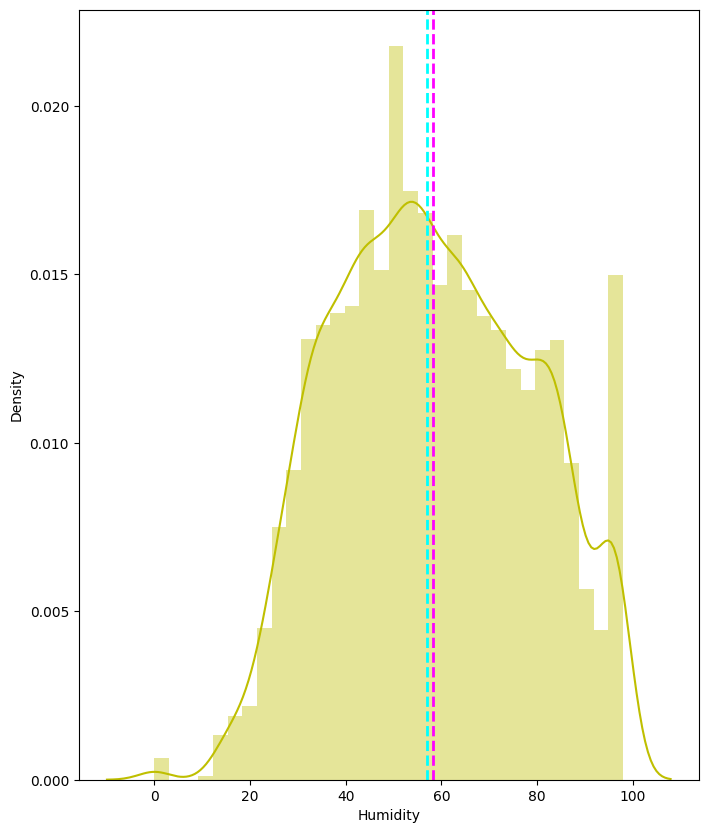

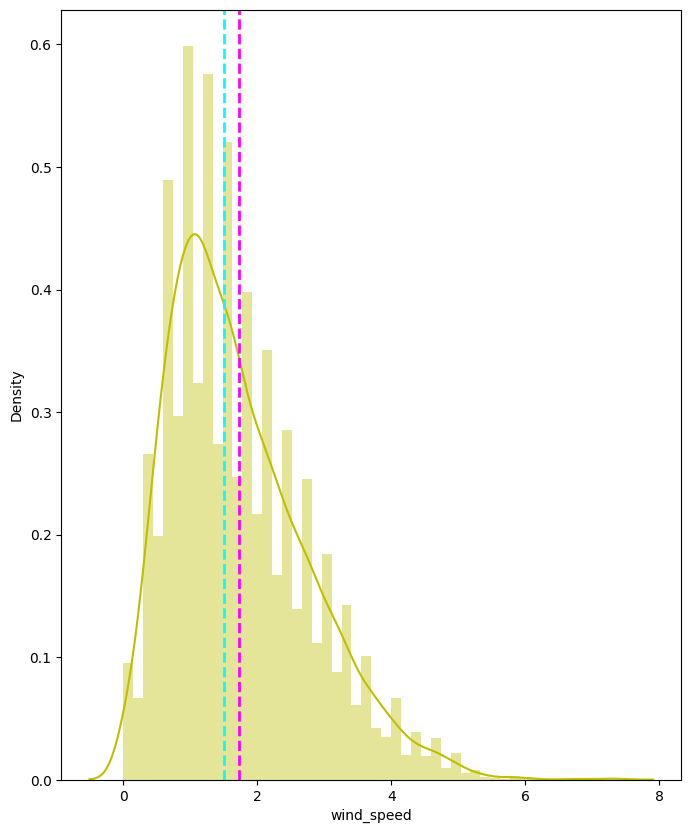

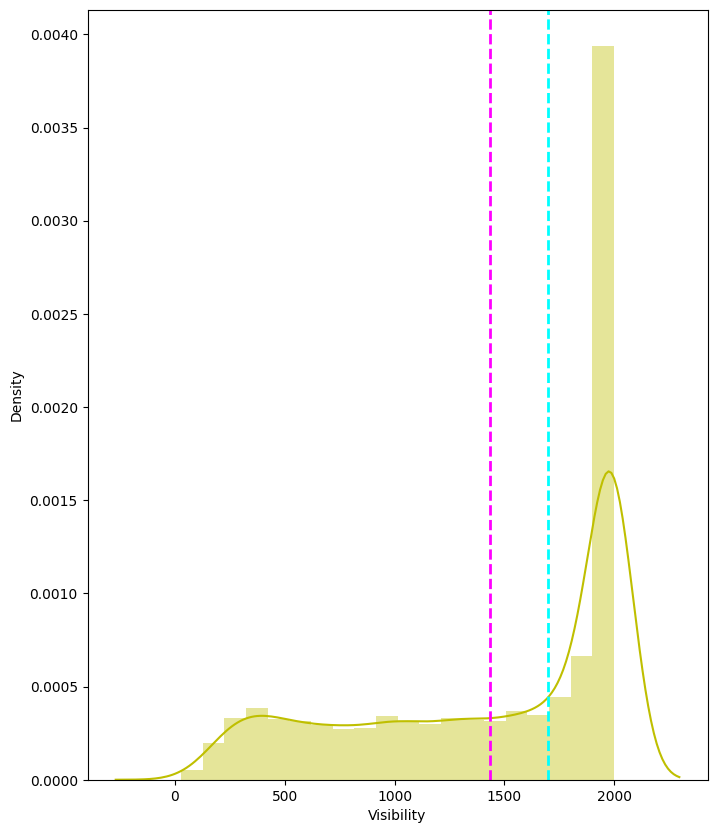

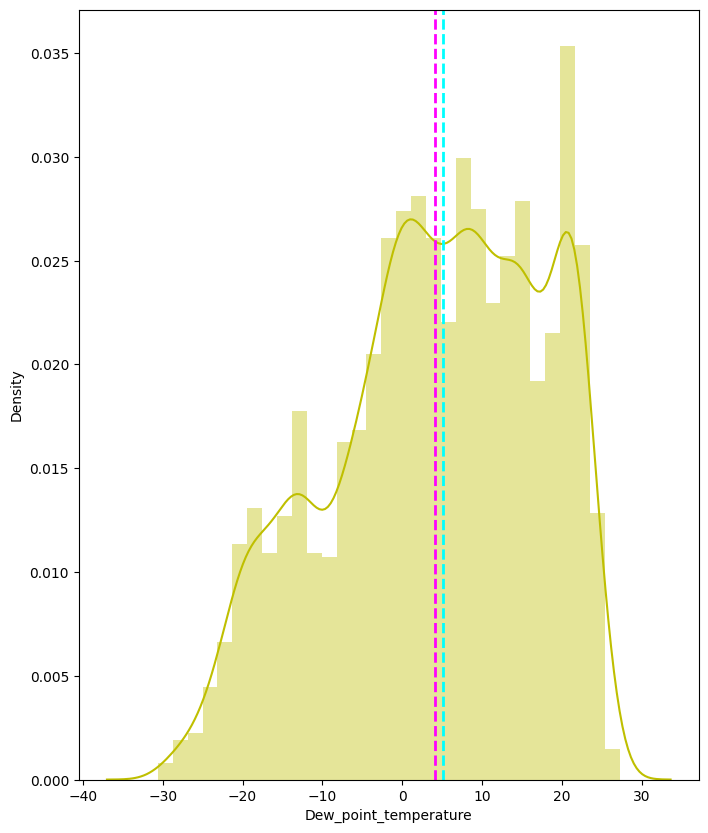

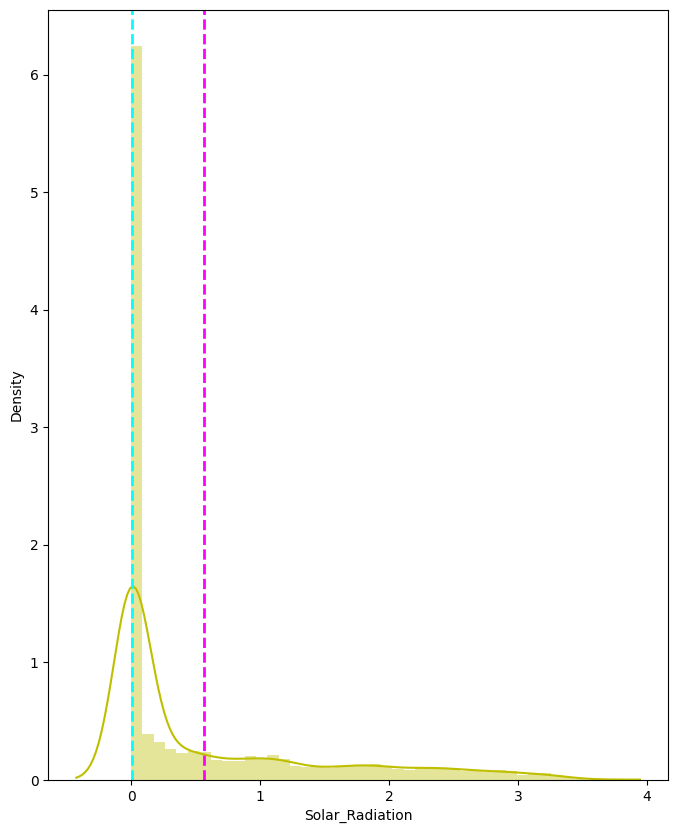

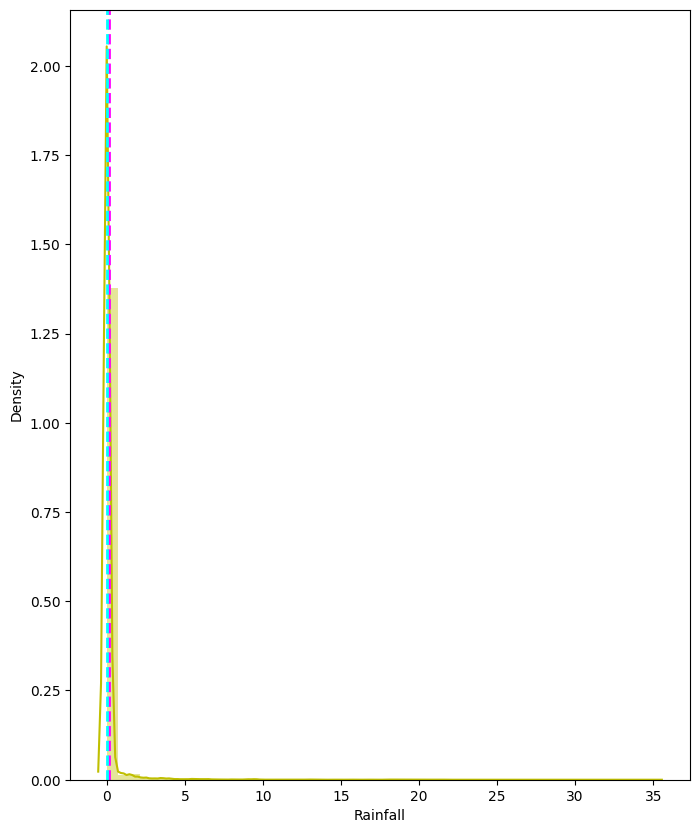

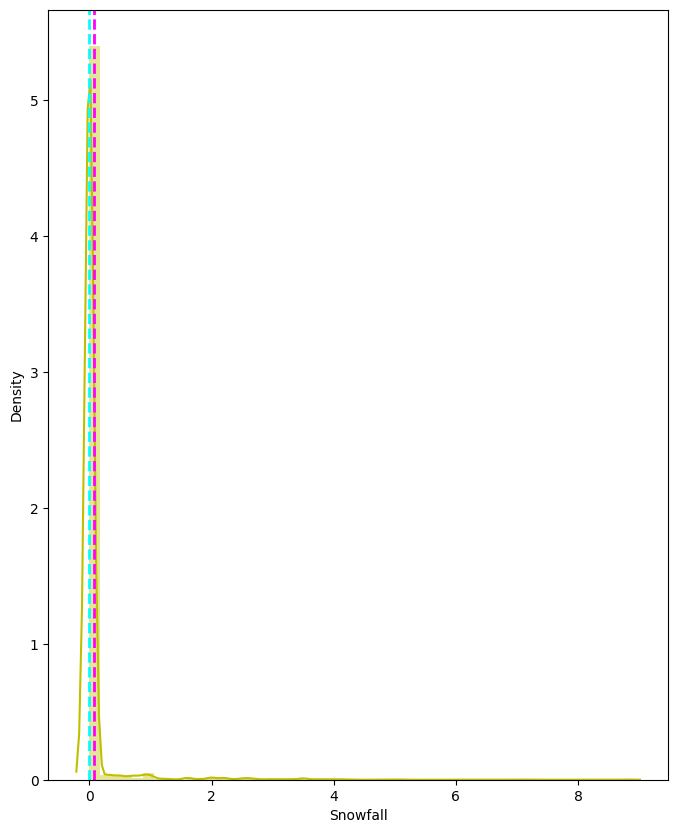

In [ ]:
# Chart - 2 visualization code
#plotting distplot for various features
numerical_columns=list(['Temperature', 'Humidity', 'wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'])

for col in numerical_columns:
  plt.figure(figsize=(8,10))
  sns.distplot(x=bike_df[col],color='y')
  plt.axvline(bike_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(bike_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.xlabel(col)
plt.show()


##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.



##### 2. What is/are the insight(s) found from the chart?

Just a histogram and box plot cannot define business impact. It's done just to see the distribution of the column data over the dataset.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

In [ ]:
bike_df.columns

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'day_of_week', 'month', 'year', 'weekday'],
      dtype='object')

In [ ]:
bike_df.head()

Date  Rented_bike_count  Hour  Temperature  Humidity  wind_speed  \
0 2017-12-01                254     0         -5.2        37         2.2   
1 2017-12-01                204     1         -5.5        38         0.8   
2 2017-12-01                173     2         -6.0        39         1.0   
3 2017-12-01                107     3         -6.2        40         0.9   
4 2017-12-01                 78     4         -6.0        36         2.3   

   Visibility  Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  \
0        2000                  -17.6              0.0       0.0       0.0   
1        2000                  -17.6              0.0       0.0       0.0   
2        2000                  -17.7              0.0       0.0       0.0   
3        2000                  -17.6              0.0       0.0       0.0   
4        2000                  -18.6              0.0       0.0       0.0   

  Seasons  Holiday  Functioning_Day day_of_week     month  year  weekday  
0  Winter        0                1      Friday  December  2017     True  
1  Winter        0                1      Friday  December  2017     True  
2  Winter        0                1      Friday  December  2017     True  
3  Winter        0                1      Friday  December  2017     True  
4  Winter        0                1      Friday  December  2017     True

#### Chart - 3

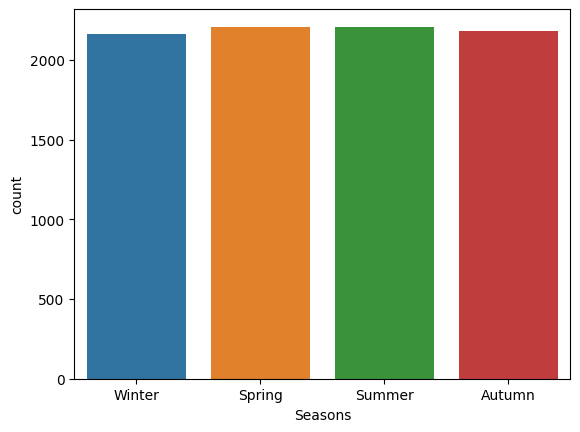

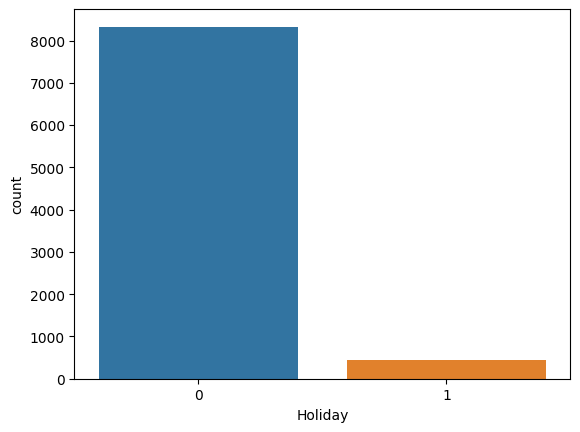

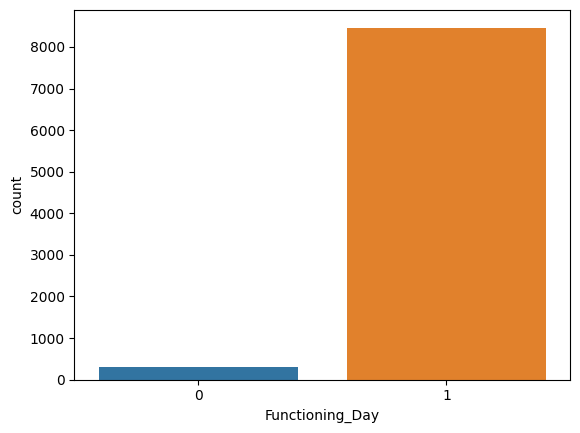

In [ ]:
# Chart - 3 visualization code
#plotting barchart for categorical columns
categorical=['Seasons', 'Holiday', 'Functioning_Day']
for i in categorical:
  sns.countplot(data=bike_df, x=i)
  plt.show()

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. A bar chart is used when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others.

Thus, I used bar chart to show and compare the count among different seasons, Holiday and Fuctioning day.

##### 2. What is/are the insight(s) found from the chart?

* Observations for all four seasons are fairly equal.
* Observations for Holidays are very less compared to Non- Holiday observations.
* Observations for Functioning days are very large and Non functioning day are very less.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It's done just to see the distribution of the column data over the dataset.

### Bivariate Analysis

#### Chart - 4- Understanding relationship of variables(numerical) with target variable(Bivariate)

In [ ]:
bike_df.columns

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'day_of_week', 'month', 'year', 'weekday'],
      dtype='object')

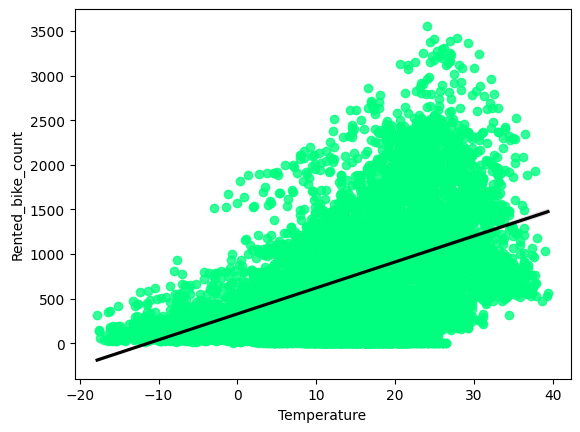

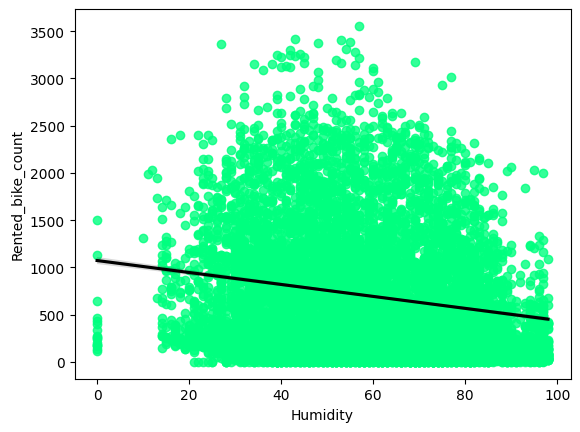

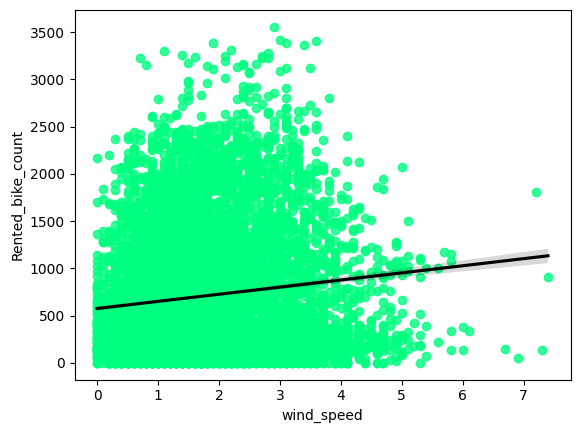

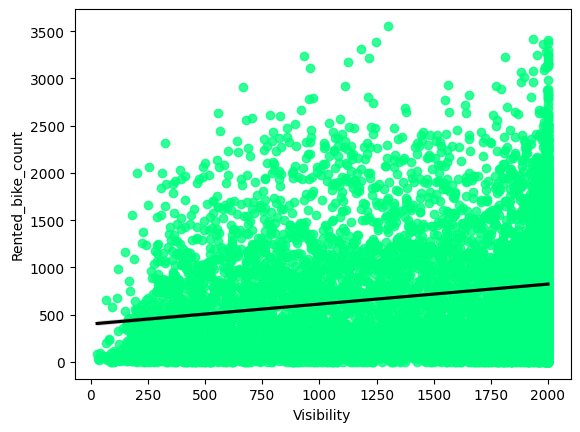

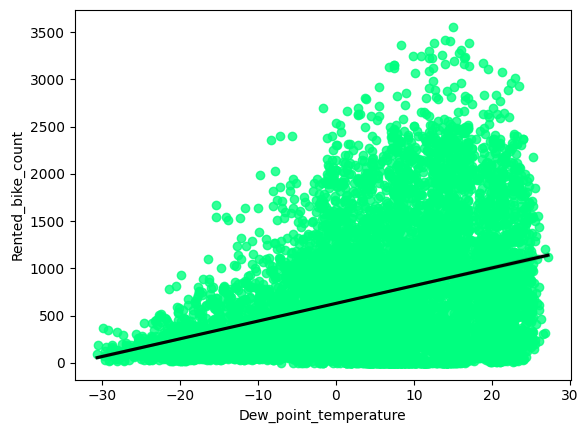

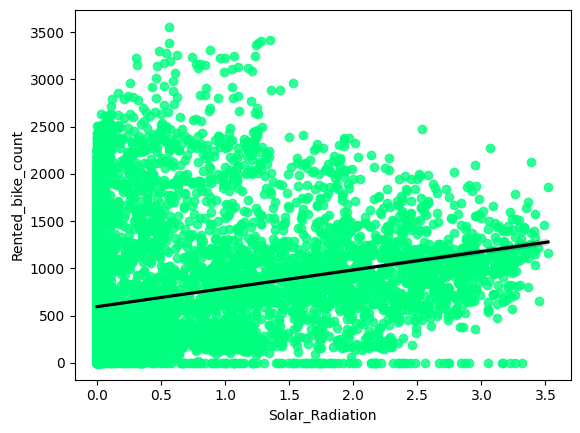

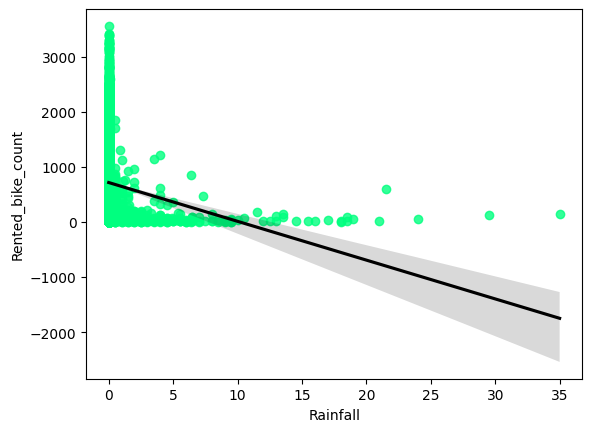

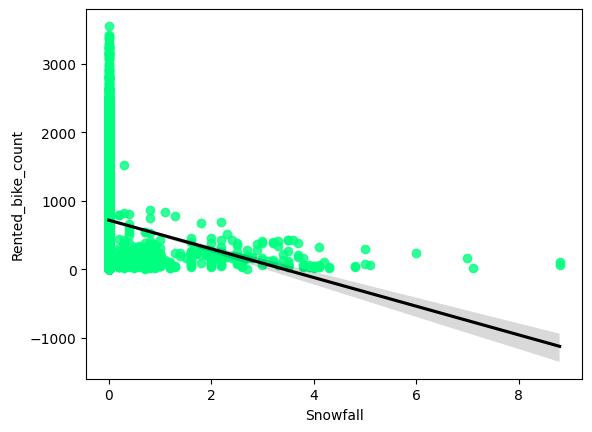

In [ ]:
#Understanding relationship of variables with target variable using regplot
for i in numerical_columns:
  sns.regplot(bike_df, x=i, y='Rented_bike_count',line_kws={"color": "black"},scatter_kws={"color": 'springgreen'})
  plt.show()

##### 1. Why did you pick the specific chart?

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis.

Regplot is a function of scatter plot, which helps us to understand the relationship between independent variable with respect to target variable.
seaborn.regplot() method is used to plot data and draw a linear regression model fit.

##### 2. What is/are the insight(s) found from the chart?


* General trend is as the temperature increases number of bike rentals also increases.
* Bike rental count decreases with increase in Humidity.
* Bike Rentals are fairly invariable of Wind speed but a faint increase can be seen in the trendline.
* Bike Rentals mildly increases with increase in Visibility
* Sharp increase can be noted with increase in Dew Point temperature.
* On an average, Rented bike counts increases with increase in Solar Radiation.
* Decline in Bike Rentals is seen with increase in Rainfall.
* Decline in Bike Rentals is seen with increase in Snowfall.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

For Bike sharing services these data's and trends are very cruicial in understanding the "How natural environment agents create impact on Bike renting"
From above scatter plot charts you can understand how customer perefer renting a bike when tempearture is mild and pleasent, less rainfall and snowfall, when visibility is good and wind speed should be at ideal condition.
Bike sahring companies can manage supplies and outlet points according to this trends.

#### Chart - 5- Relationship between Target variable and Weekday (Bivariate)

<Axes: xlabel='weekday', ylabel='Rented_bike_count'>

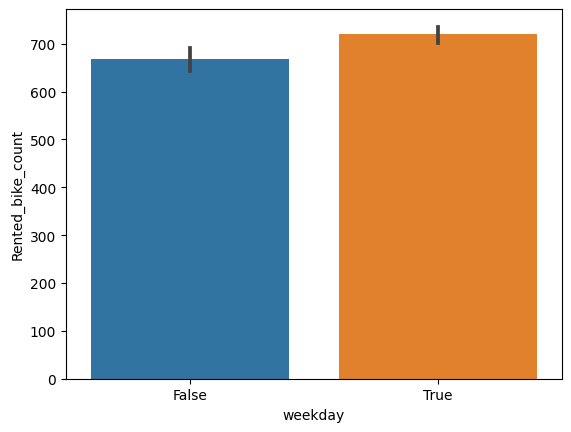

In [ ]:
sns.barplot(x='weekday', y='Rented_bike_count', data=bike_df)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.So, I pick a bar graph to perform a comparison of metric values across different subgroups of Weekday.

##### 2. What is/are the insight(s) found from the chart?

Bike Rentals on weekdays are a little higher than on weekends. This might be due to the usage of Bike Rentals for commuting to office.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This graph tells the Bike renting companies that most of people used bike services on weeday instead on weekends. It indicates that people might using bike rental sevices for commuting to their work.

#### Chart - 6

<Axes: xlabel='Holiday', ylabel='Rented_bike_count'>

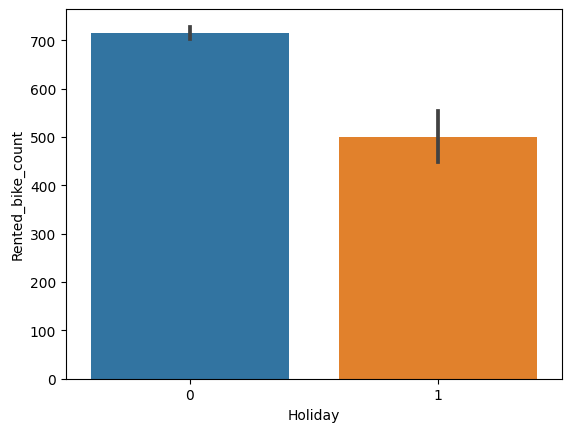

In [ ]:
sns.barplot(x='Holiday',y='Rented_bike_count',data=bike_df)

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.So, I pick a bar graph to perform a comparison of metric values across different subgroups of Holiday.

##### 2. What is/are the insight(s) found from the chart?

 Rented Bikes count is way more on working days than on Holidays. This might due to the usage of Rental Bikes for commuting to office.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This charts shows that people rent bikes on working days for commuting to their work. This may help Bike sharing companies to understand the usage and can create sales plans and  it also helps them to manage their bike inventory on each station according to trend.

#### Chart - 7 -Bike rent count in different seasons(Bivariate)

<Axes: xlabel='Seasons', ylabel='Rented_bike_count'>

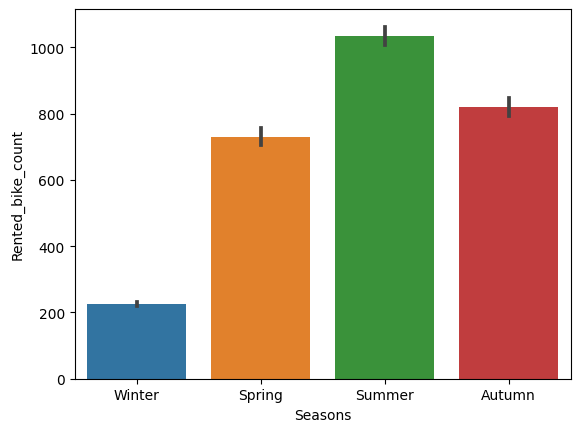

In [ ]:
sns.barplot(data=bike_df,x='Seasons',y='Rented_bike_count')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.So, I pick a bar graph to perform a comparison of metric values across different subgroups of seasons.

##### 2. What is/are the insight(s) found from the chart?

* Highest Mean Rentals were observed during Summer.
* Lowest Rentals were observed in Winters. This might be due to high snowfall and subzero temperature in city and also the holiday season during month of december.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This charts shows that people rent bikes more in comaprison to other seasons. Whereas bike service facing heavy decline in winter. This may help Bike sharing companies to understand the usage and can create sales plans and  it also helps them to manage their bike inventory on each station according to seasons.

#### Chart - 8- Bike rent count on different days of week.(Bivariate)

<Axes: xlabel='day_of_week', ylabel='Rented_bike_count'>

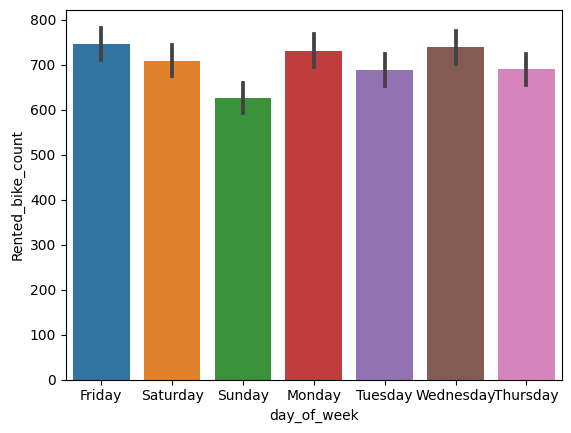

In [ ]:
sns.barplot(x='day_of_week',data=bike_df, y='Rented_bike_count')

##### 1. Why did you pick the specific chart?

A bar chart or bar graph is a chart or graph that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent.So, I pick a bar graph to perform a comparison of metric values across different subgroups of day_of_week.

##### 2. What is/are the insight(s) found from the chart?

Bike Rentals were fairly equal on all days with a decline in Rentals on Sundays.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

All these Bivariate analysis helps bike renting companies to understand the bike usage according to seasons. In which seasons they need to preapre more and needs to deploy startegies to manage their inventories and plans.

#### Chart - 9- Bike rent count in different months(Bivariate)

<Axes: xlabel='month', ylabel='Rented_bike_count'>

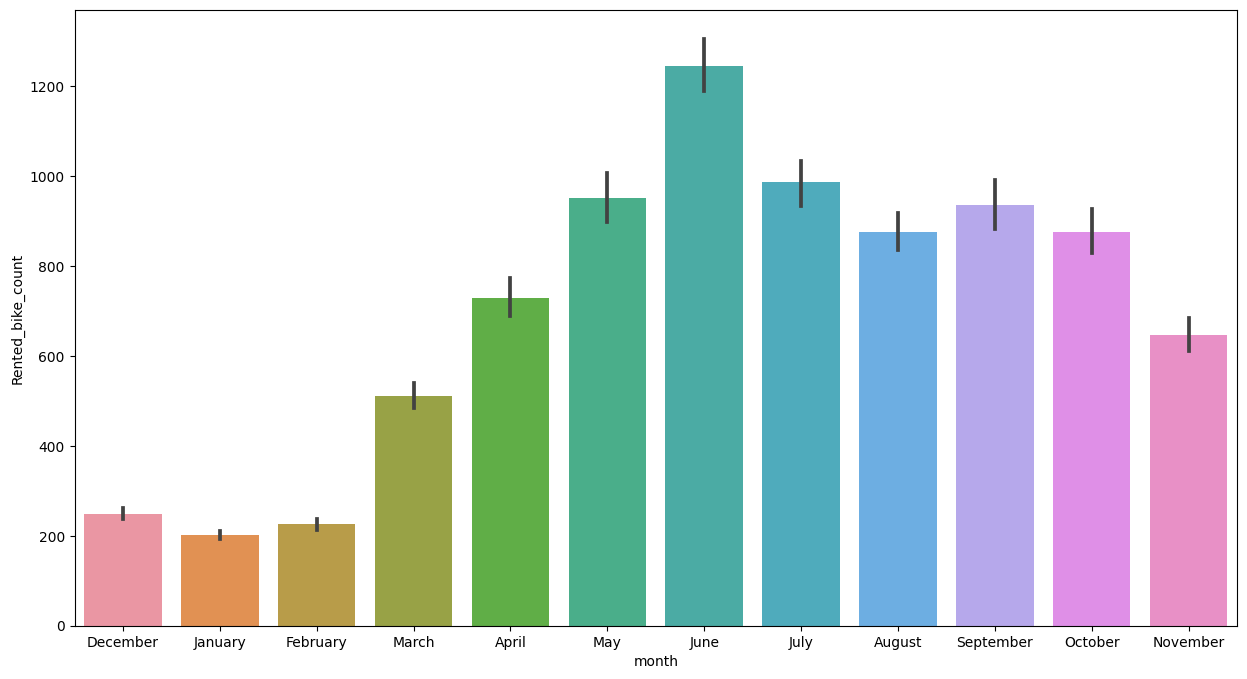

In [ ]:
plt.subplots(figsize=(15,8))
sns.barplot(x='month',data=bike_df, y='Rented_bike_count')

##### 1. Why did you pick the specific chart?

A bar chart helps to plot and evaluate the metric of subgroups of a certain features. So I choose bar graph to plot count of bike rent with respects to given months.

##### 2. What is/are the insight(s) found from the chart?

* Least Rentals were observed in the month of December, January and February 
i.e. during winter seasons.
* Highest Rentals were observed during the months of May, June, July i.e. during summer.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This analysis leads to create a positive impact as company knows which months are going to be more busy and they can plan their strategy according to that.

#### Chart - 10- Bike rent count at different Hours(Bivariate)

Text(0.5, 1.0, 'Hour vs Rented Bike count')

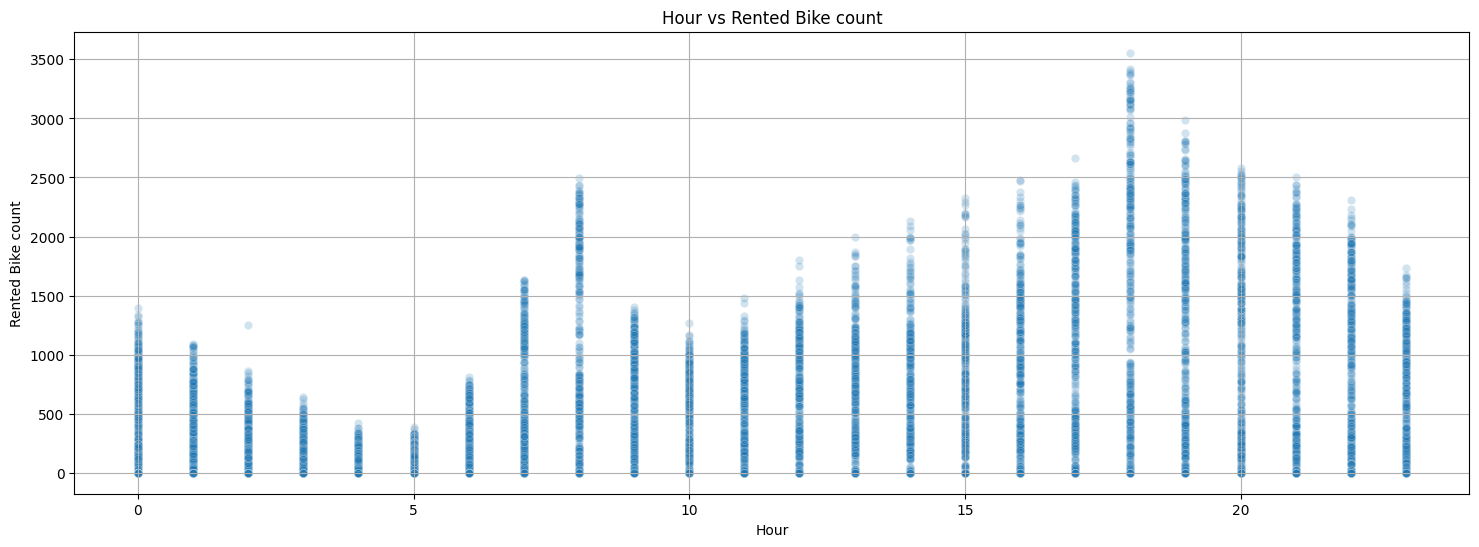

In [ ]:
plt.figure(figsize=(18,6))
plt.grid()
sns.scatterplot(bike_df, x='Hour', y='Rented_bike_count', alpha=0.2)
plt.ylabel("Rented Bike count")
plt.title('Hour vs Rented Bike count')

<Axes: xlabel='Hour', ylabel='Rented_bike_count'>

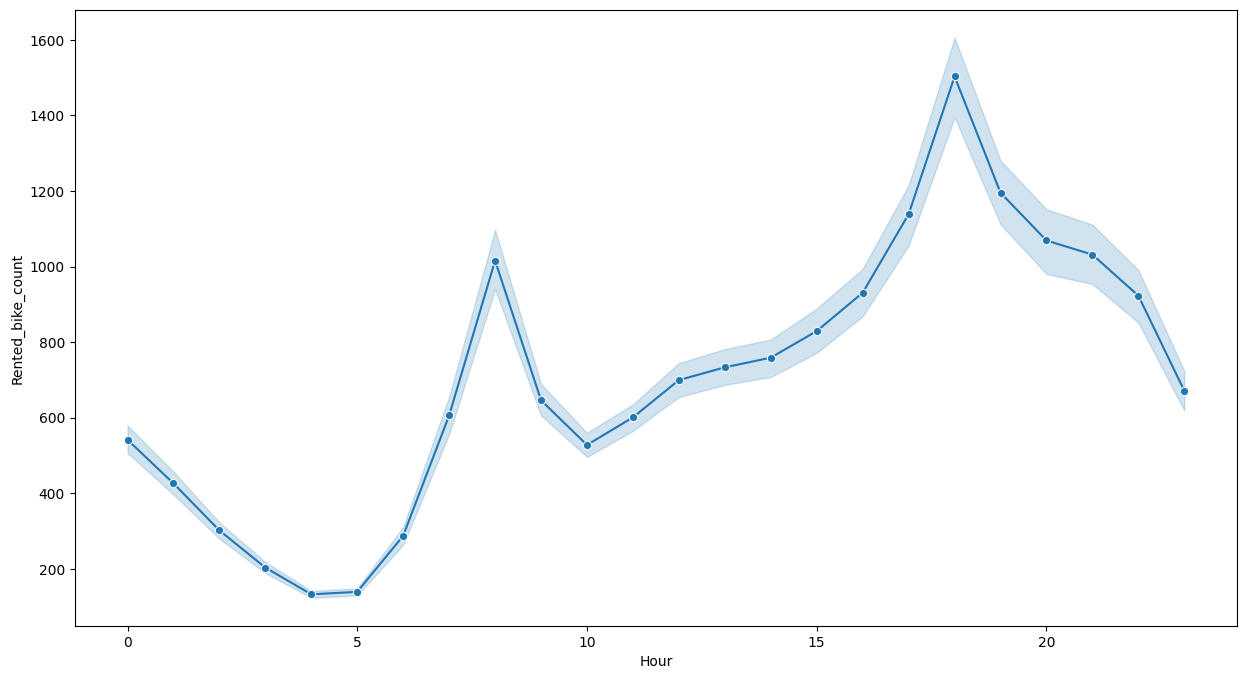

In [ ]:
plt.subplots(figsize=(15,8))
sns.lineplot(x='Hour',data=bike_df, y='Rented_bike_count',linestyle='-',marker='o')

##### 1. Why did you pick the specific chart?

Scatter plots are the graphs that present the relationship between two variables in a data-set. It represents data points on a two-dimensional plane or on a Cartesian system. The independent variable or attribute is plotted on the X-axis, while the dependent variable is plotted on the Y-axis. So, I choose scatter plot to show the relationship between target variable and Hour.

I also use Line chart to track changes over time. 

##### 2. What is/are the insight(s) found from the chart?

* Demand of Bikes is minimum from Midnight to 6 A.M.
* Sharp increase in demand can be seen from 7 A.M. to 8 A.M. then declines. This might be due to office and school goers.
* Steady increase in demand is witnessed from 11 AM till 4 PM.
* Sudden spike in rentals is seen from 4 PM to 6 PM possibly indicating return of office goers.
Rental demand thereafter decreases steadily.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights found will definitely help for a positive business impact. 
From these insights bike renting sevice can manage their inventory in better manner.
Most of demand can be seen at peak morning office hours and evening hours when people return their home from work.

### Multivariate Analysis

#### Chart 11 - Relationship between target variable, Hour and day of week.

Text(0.5, 1.0, 'Hour vs Rented Bike count vs days')

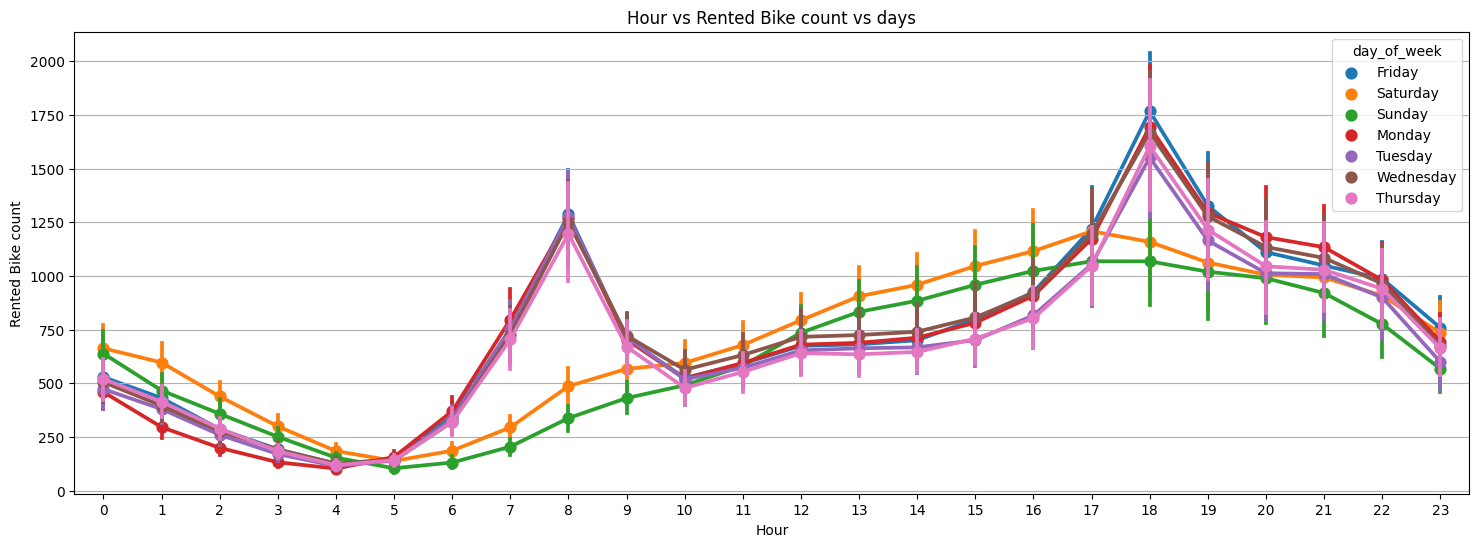

In [ ]:
plt.figure(figsize=(18,6))
plt.grid()
sns.pointplot(bike_df, x='Hour', y='Rented_bike_count', markers='o', hue='day_of_week')
plt.ylabel("Rented Bike count")
plt.title('Hour vs Rented Bike count vs days')

##### 1. Why did you pick the specific chart?

I pick the line chart which depict the change in rented bike count over time on respective days. 

##### 2. What is/are the insight(s) found from the chart?

* Sudden spike is seen between 7-9 AM and 5-7 PM. This is due to the office goers and students.
* Rentals after midnight are more on weekends than weekdays.
* Rentals during day is more on weekdays than weekends and sudden jump is also not witnessed during weekends.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes this insight definately help to create a positive impact on business as companies know who are their prime customers and when they need bikes most.
They can also manage their inventories and station according to the above insights.

#### Chart - 12- Relationship between target variable, Hour and seasons.

Text(0.5, 1.0, 'Hour vs Rented Bike count vs seasons')

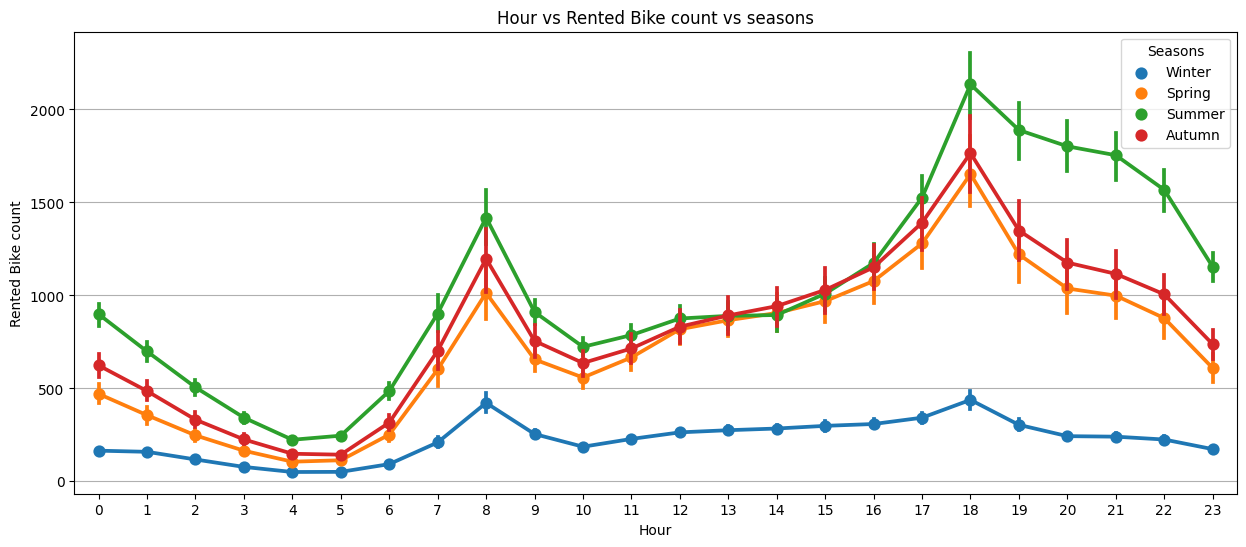

In [ ]:
plt.figure(figsize=(15,6))
plt.grid()
sns.pointplot(bike_df, x='Hour', y='Rented_bike_count', markers='o', hue='Seasons')
plt.ylabel("Rented Bike count")
plt.title('Hour vs Rented Bike count vs seasons')

##### 1. Why did you pick the specific chart?

Line chart easily shows the changes over time.So, I pick line chart to show change in bike rent count of different season at different hours.

##### 2. What is/are the insight(s) found from the chart?

* Peak hours remain to be the same irrespective of the seasons.
* Winters have least numbers of rentals followed by Spring, Autumn and Summer respectively.
* Demand after 6 PM is marginally high during winters than other seasons.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insight is very helpful for bike rental companies as they knwo whhich seasons and hours are more important and needs to target.
they can plan some offer and manage their inventories according to above insights.

#### Chart - 14 - Correlation Heatmap

<Axes: >

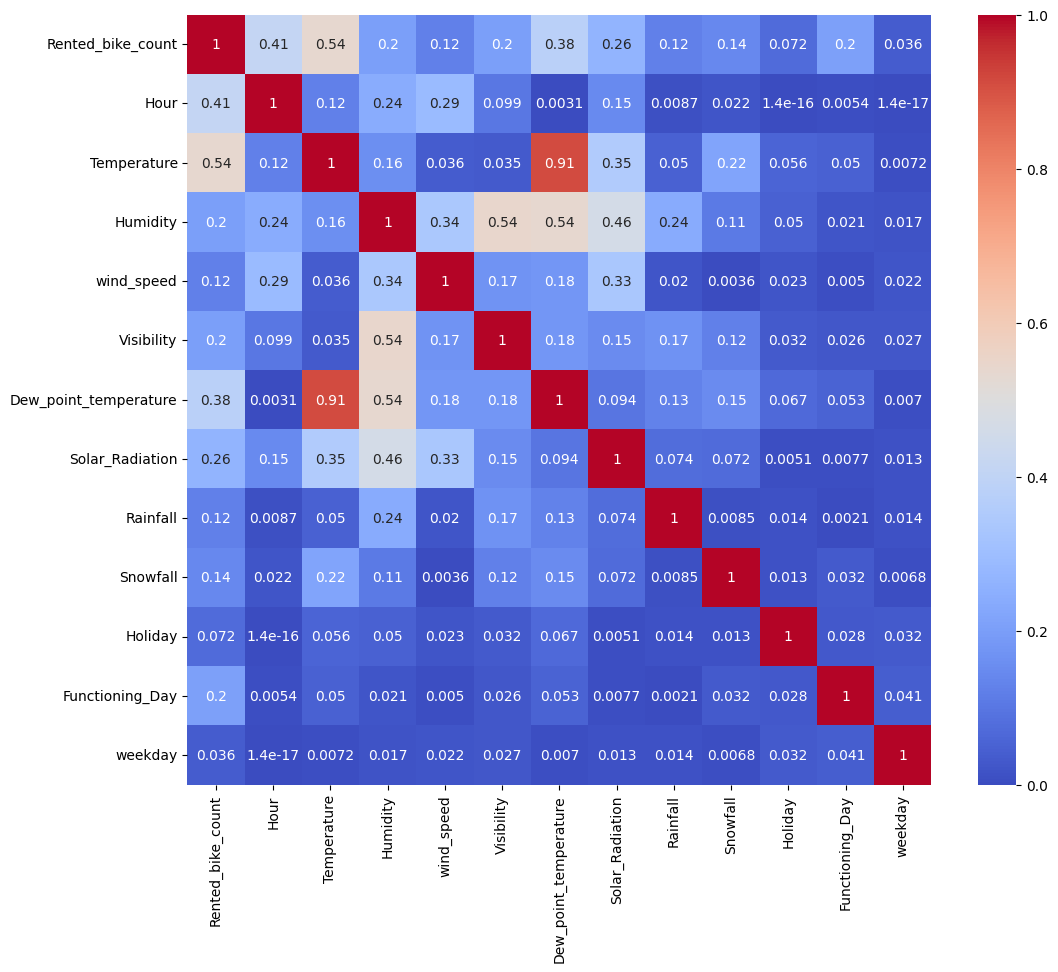

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
sns.heatmap(bike_df.corr().abs(), annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From the above correlation heatmap, we can say that - Dew Point Temperature and Temperature are highly correalted thus one of them should be removed before applying linear regression.

Rest all correlation can be depicted from the above chart.

#### Chart - 15 - Pair Plot 

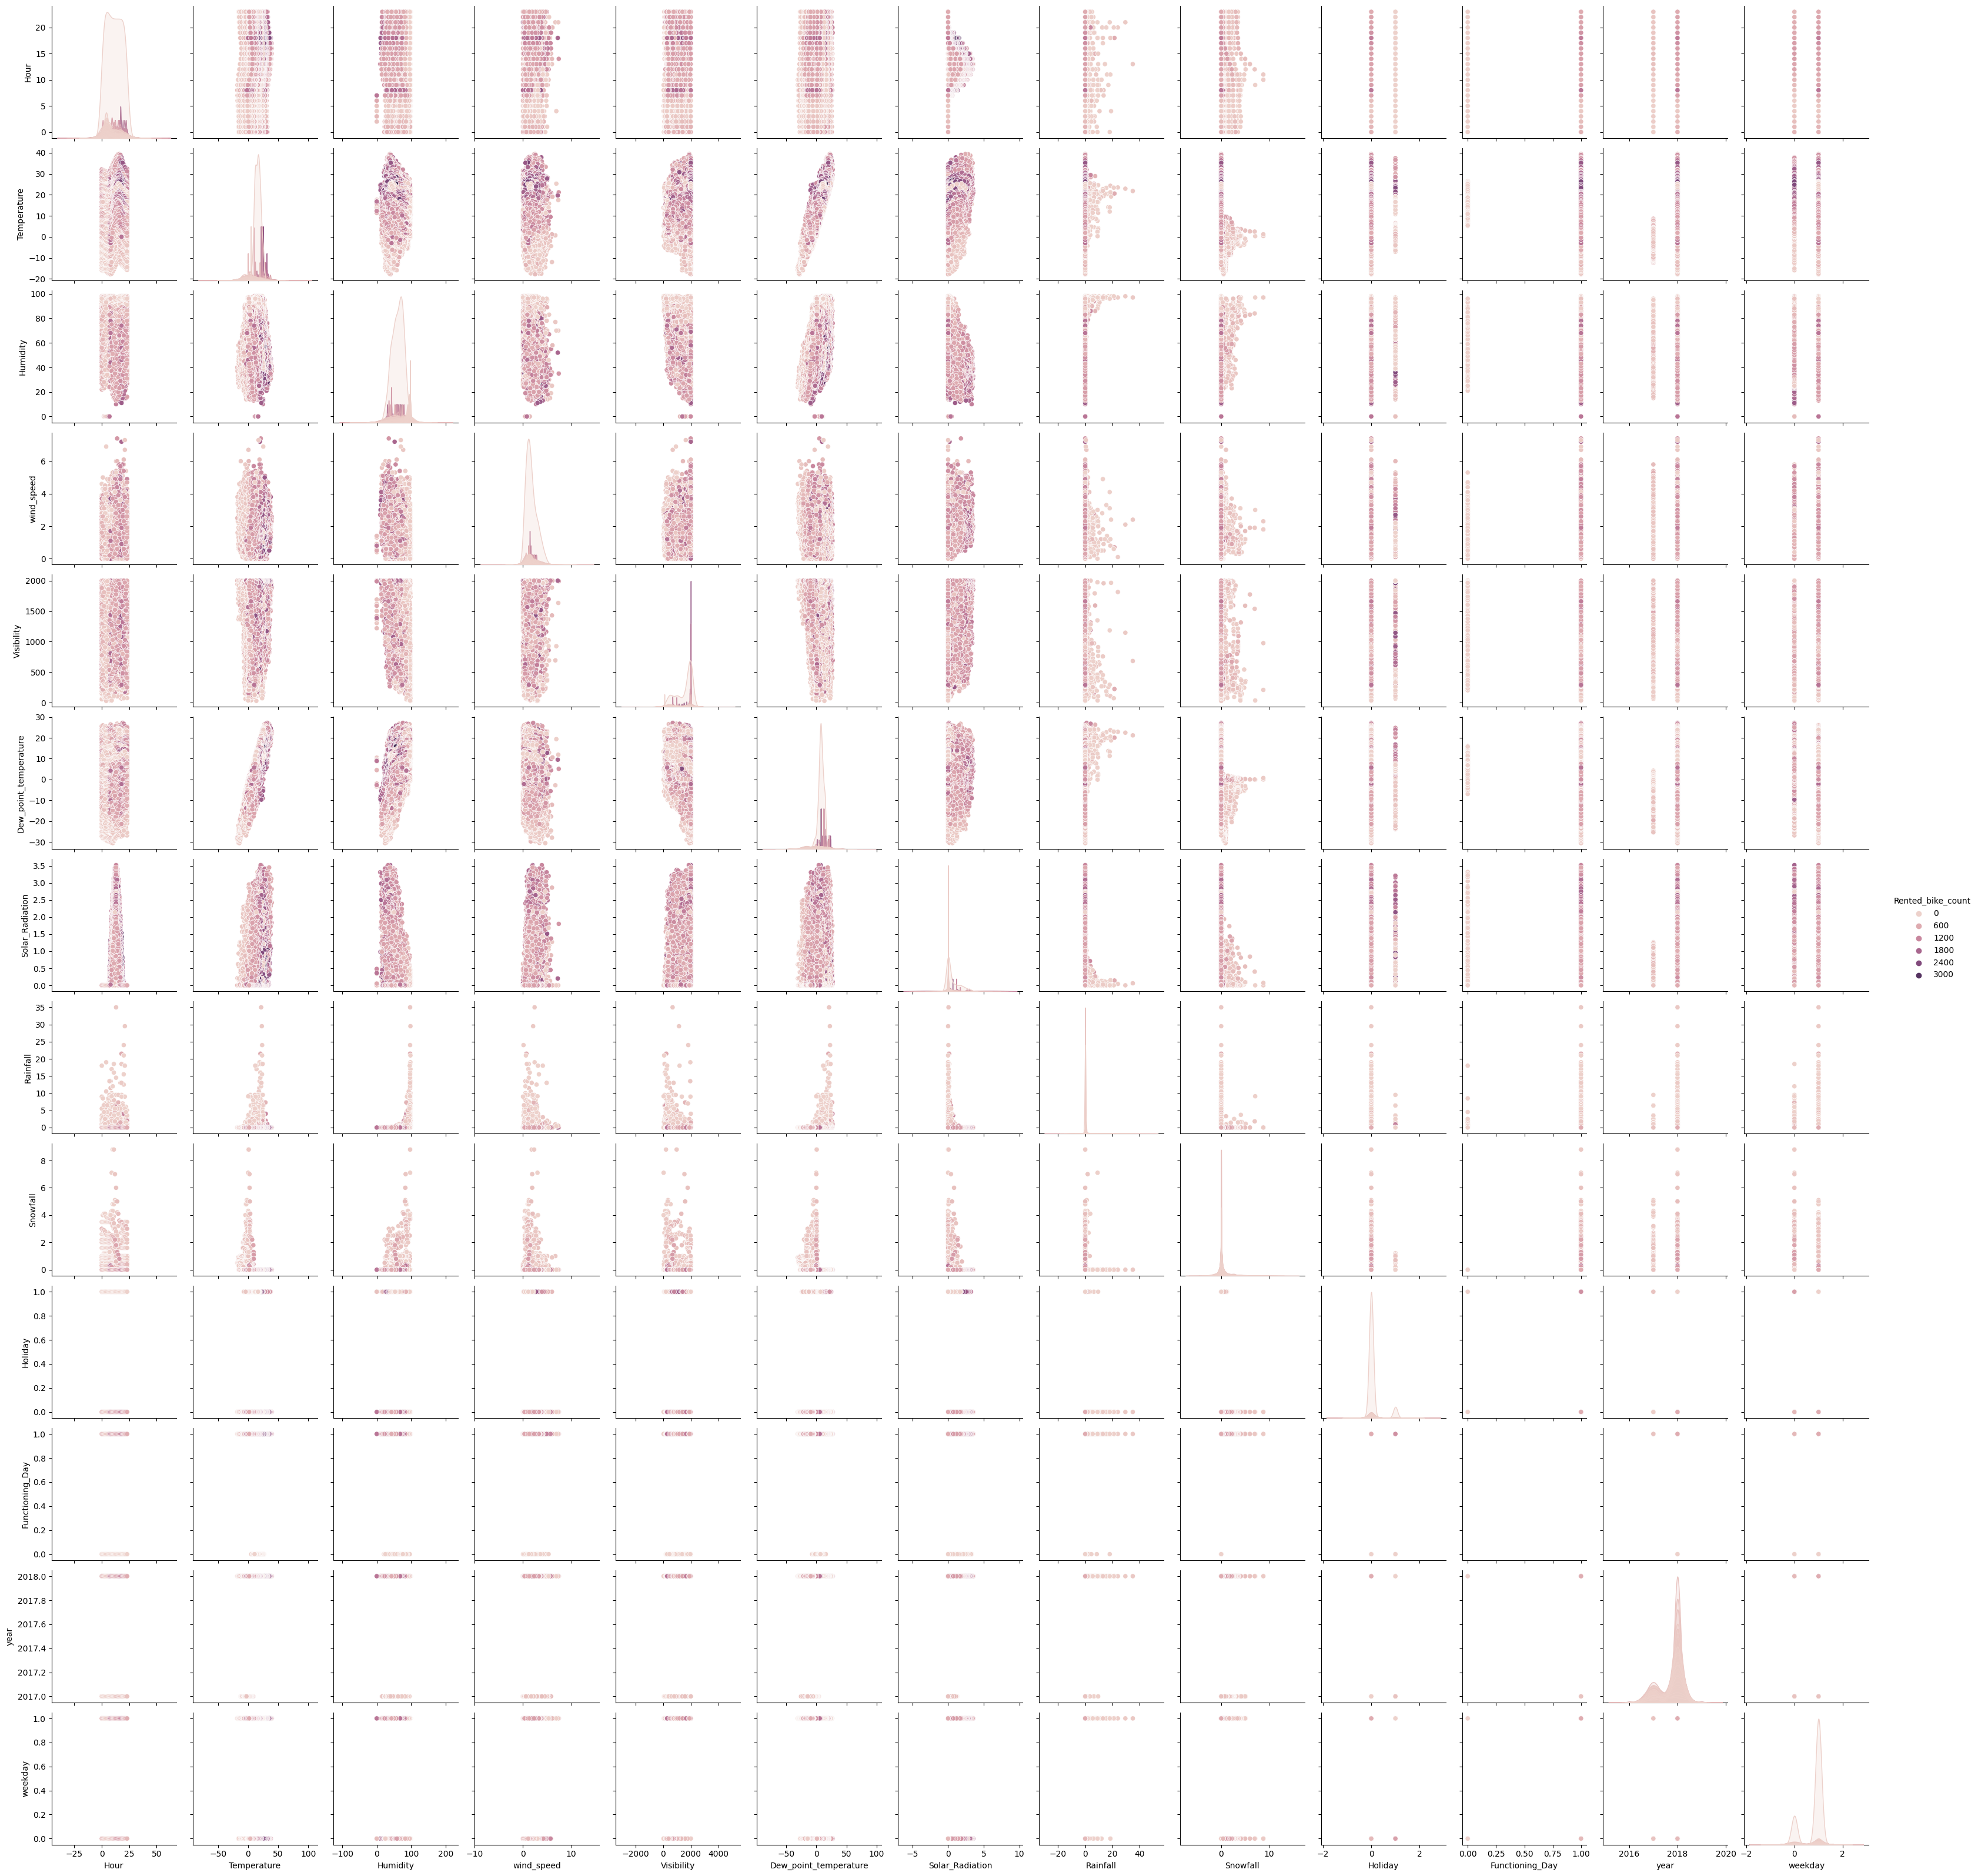

In [ ]:

sns.pairplot(data=bike_df,hue="Rented_bike_count")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

It is simple pair plot to see corelation among variables in graphical representation. we found out dew point temp is highly corelated with temperature.

## ***5. Hypothesis Testing***

**A statistical hypothesis test is a method of statistical inference used to decide whether the data at hand sufficiently support a particular hypothesis. Hypothesis testing allows us to make probabilistic statements about population parameters.**

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The average number of bike rentals is different on weekends than on weekdays.
* There is a significant difference in the average number of bike rentals during different seasons.

### Hypothetical Statement - 1

The average number of bike rentals is different on weekends than on weekdays.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: Average bike rentals is same on Weekend as well as Weekdays.

* Alternative Hypothesis: Average bike rentals is different on Weekend and Weekdays.
* Test type:  z-test

#### 2. Perform an appropriate statistical test.

In [ ]:
#split the data into two groups: one for weekdays and one for weekends
weekday_rentals = bike_df.loc[bike_df['weekday'], 'Rented_bike_count']
weekend_rentals = bike_df.loc[~bike_df['weekday'], 'Rented_bike_count']

#perform a two-sample t-test to compare the means of the two groups
t,p = ztest(weekday_rentals, weekend_rentals)

# Print the results
print('t-statistic:', t)
print('p-value:', p)


t-statistic: 3.415044819241552
p-value: 0.0006377151729642665


In [ ]:
# Determine if the p-value is significant at the 5% level
if p < 0.05:
    print('Reject the null hypothesis:')
    print('The mean number of bike rentals is significantly different on weekends compared to weekdays.')
else:
    print('Fail to reject the null hypothesis:')

Reject the null hypothesis:
The mean number of bike rentals is significantly different on weekends compared to weekdays.


##### Which statistical test have you done to obtain P-Value?

the p-value is the probability of obtaining a z-value with an absolute value at least as large as the one we actually observed in the sample data if the null hypothesis is actually true.


##### Why did you choose the specific statistical test?

A z-test is a statistical test to determine whether two population means are different when the variances are known and the sample size is large.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

There is a significant difference in the average number of bike rentals during different seasons.
Null Hypothesis:  Average number of bike rentals is same during different seasons.

Alternative Hypothesis:  Average number of bike rentals is different during different seasons.

Test type: ANOVA test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Separate the data into four groups (one for each season)
spring_rentals = bike_df.loc[bike_df['Seasons'] == 'Spring', 'Rented_bike_count']
summer_rentals = bike_df.loc[bike_df['Seasons'] == 'Summer', 'Rented_bike_count']
fall_rentals = bike_df.loc[bike_df['Seasons'] == 'Autumn', 'Rented_bike_count']
winter_rentals = bike_df.loc[bike_df['Seasons'] == 'Winter', 'Rented_bike_count']

In [ ]:
# Perform an ANOVA test
f_statistic, p_value = f_oneway(spring_rentals, summer_rentals, fall_rentals, winter_rentals)

print('F-statistic:', f_statistic)
print('p-value:', p_value)

F-statistic: 776.4678149879506
p-value: 0.0


In [ ]:
# Determine if the p-value is significant at the 5% level
if p_value < 0.05:
    print('We reject the null hypothesis:')
else:
    print('We fail to reject the null hypothesis:')

We reject the null hypothesis:


##### Which statistical test have you done to obtain P-Value?

We use ANOVA test, which use F-statistics F-tests to statistically assess the equality of means when you have three or more groups.

##### Why did you choose the specific statistical test?

ANOVA is to test for differences among the means of the population by examining the amount of variation within each sample, relative to the amount of variation between the samples.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
bike_df.isnull().sum()

Date                     0
Rented_bike_count        0
Hour                     0
Temperature              0
Humidity                 0
wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
day_of_week              0
month                    0
year                     0
weekday                  0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
numerical_columns

['Temperature',
 'Humidity',
 'wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

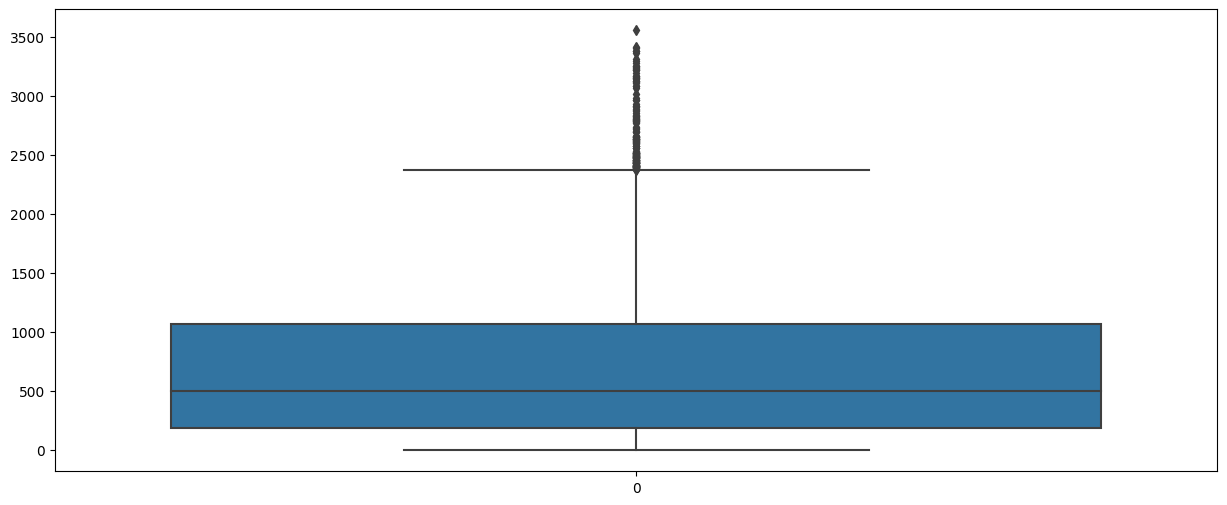

In [ ]:
plt.subplots(figsize=(15,6))
sns.boxplot(data=bike_df['Rented_bike_count'])
plt.show()

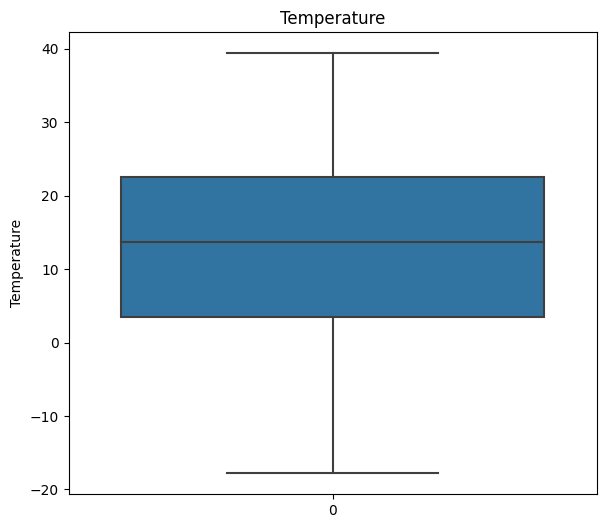

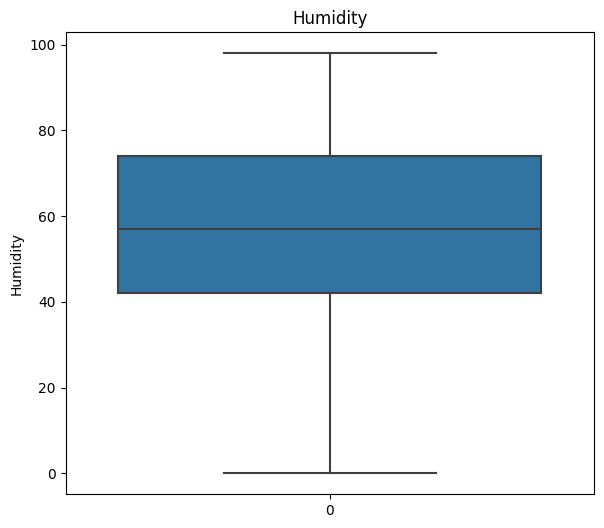

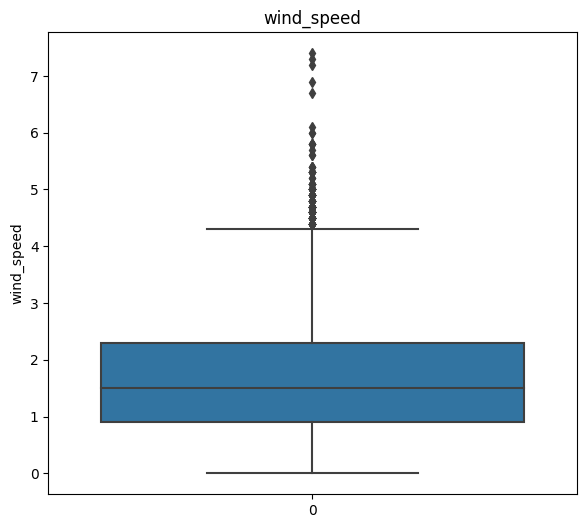

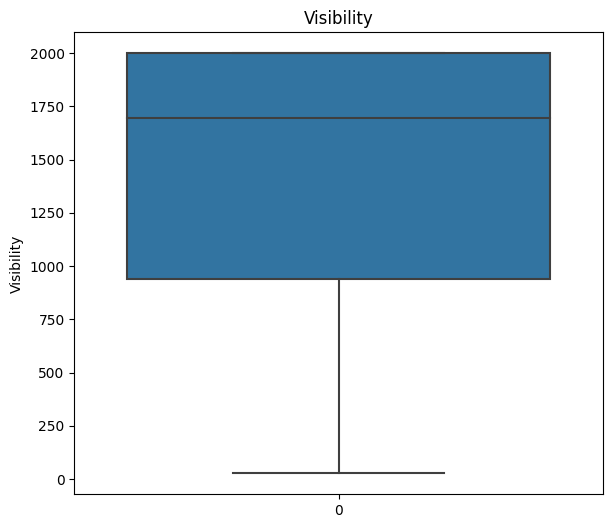

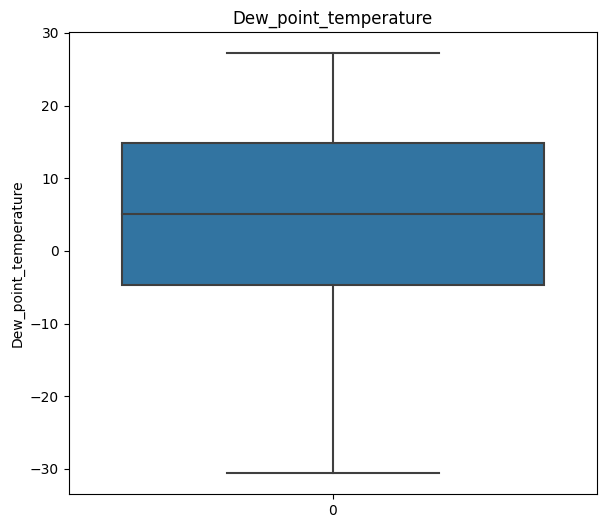

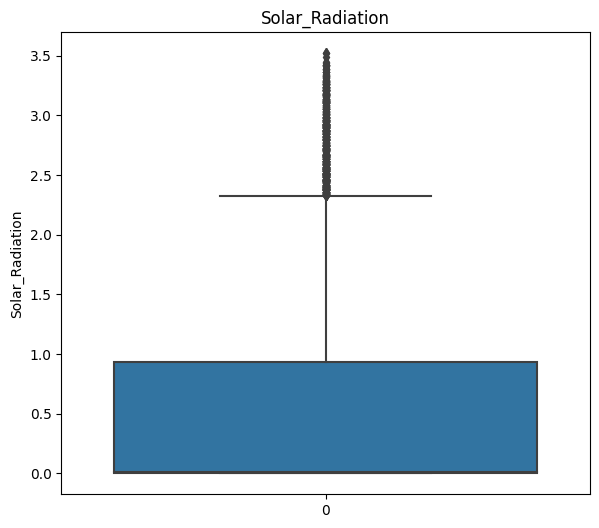

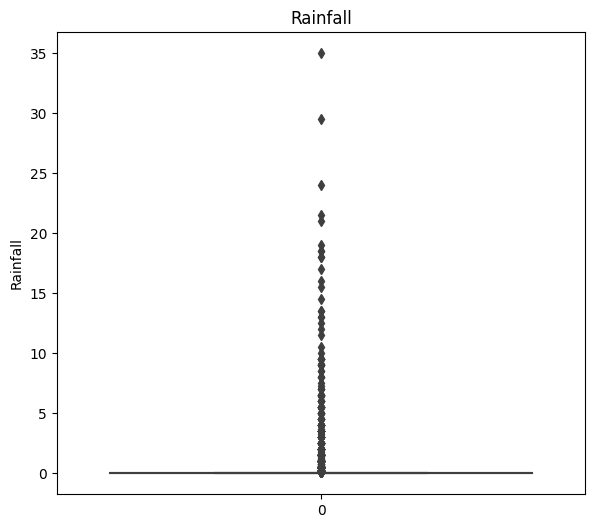

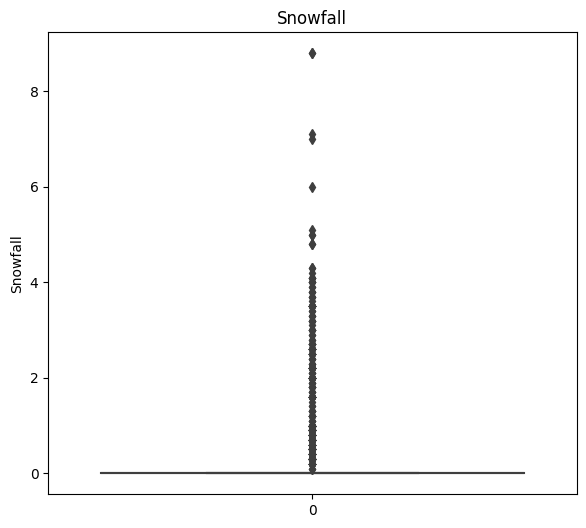

In [ ]:
from scipy.stats import norm

# Removing "Date" variable from numerical variable
num_var=[var for var in numerical_columns]

# Plotting Box and Distribution plot 
for var in num_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=bike_df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)
    plt.show()

In [ ]:
outlier_var=['Rented_bike_count', 'wind_speed', 'Solar_Radiation']

In [ ]:
for i in outlier_var:
    # Finding IQR
    Q1=bike_df[i].quantile(0.25)
    Q3=bike_df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =bike_df[i].quantile(0.25)-1.5*IQR
    upper_limit =bike_df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    bike_df.loc[(bike_df[i] > upper_limit),i] = upper_limit
    bike_df.loc[(bike_df[i] < lower_limit),i] = lower_limit

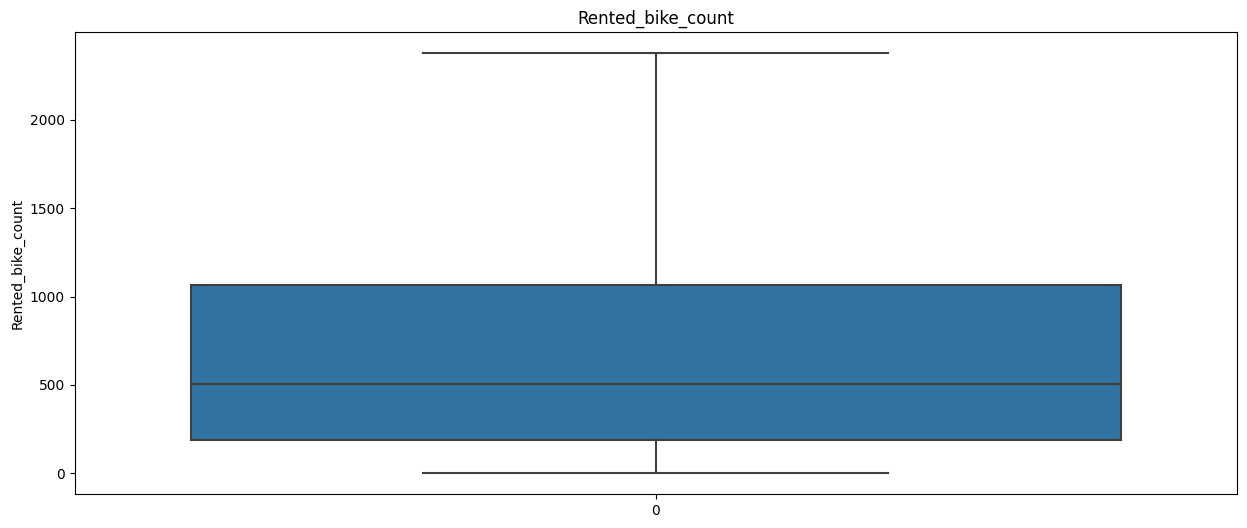

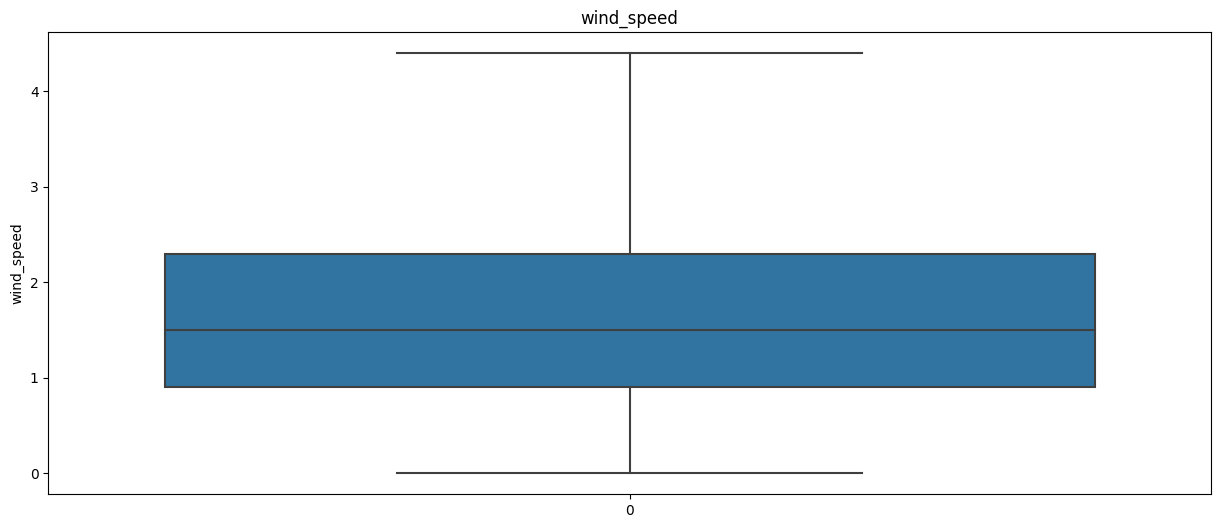

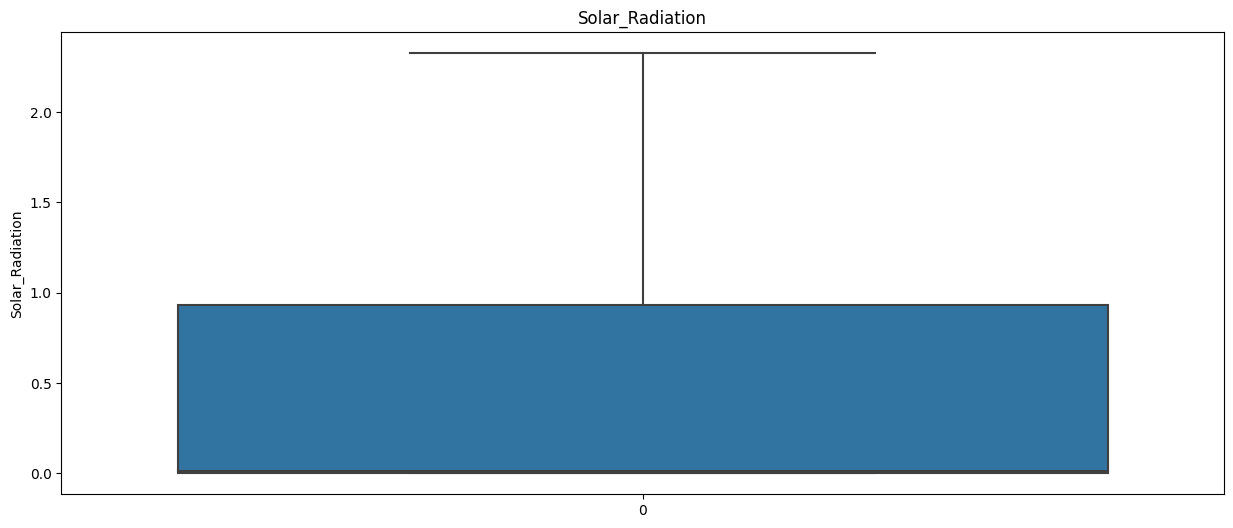

In [ ]:

for var in outlier_var:
    plt.subplots(figsize=(15,6))
    
    ax=sns.boxplot(data=bike_df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)
  
    plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

By plotting a box plot for target variable and numerical columns we can easily distinguish the features with outliers.
After finding the features who has outliers, we use IQR method treat outliers.

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 — Q1) is called the interquartile range or IQR. A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median.

> We define the Upper and lower boundry for respective datapoints:
* lower_limit =quantile(0.25)-1.5*IQR
* upper_limit =quantile(0.75)+1.5*IQR



### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

**Feature engineering refers to manipulation — addition, deletion, combination, mutation — of your data set to improve machine learning model training, leading to better performance and greater accuracy.**

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
df=bike_df.copy()

In [ ]:
df.columns

Index(['Date', 'Rented_bike_count', 'Hour', 'Temperature', 'Humidity',
       'wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day',
       'day_of_week', 'month', 'year', 'weekday'],
      dtype='object')

In [ ]:
new_df = df.drop(columns=['Date','year'])

#### 2. Feature Selection

The goal of feature selection techniques in machine learning is to find the best set of features that allows one to build optimized models of studied phenomena.

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(new_df[[i for i in new_df.describe().columns if i not in ['Rented_bike_count'] ]])

variables        VIF
0                    Hour   4.419500
1             Temperature  44.890244
2                Humidity  18.026771
3              wind_speed   5.013398
4              Visibility   9.116430
5   Dew_point_temperature  25.562939
6         Solar_Radiation   2.974870
7                Rainfall   1.082670
8                Snowfall   1.120999
9                 Holiday   1.057765
10        Functioning_Day  27.814454

In [ ]:
new_df =new_df.drop(columns=['Functioning_Day'])
new_df =new_df.drop(columns=['Dew_point_temperature'])


In [ ]:
calc_vif(new_df[[i for i in new_df.describe().columns ]])

variables       VIF
0  Rented_bike_count  4.253977
1               Hour  4.713749
2        Temperature  4.465478
3           Humidity  5.070053
4         wind_speed  4.814868
5         Visibility  4.899214
6    Solar_Radiation  2.326274
7           Rainfall  1.105118
8           Snowfall  1.120867
9            Holiday  1.060221

##### What all feature selection methods have you used  and why?

I choose VIF method to find multicollinearity among features. 

A variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model. This can adversely affect the regression results. Thus, the variance inflation factor can estimate how much the variance of a regression coefficient is inflated due to multicollinearity.

##### Which all features you found important and why?

I tried to keep VIF upto 5 and for that i drop Functioning_day feature.
Apart from feature Functioing day every features are independent and below 5. 
I found out 10 indepenedent features which are important and validate through VIF and Correlation map( EDA PART).

### 3. Categorical Encoding

Encoding categorical data is a process of converting categorical data into integer format so that the data with converted categorical values can be provided to the models to give and improve the predictions

In [ ]:
new_df.columns

Index(['Rented_bike_count', 'Hour', 'Temperature', 'Humidity', 'wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Seasons',
       'Holiday', 'day_of_week', 'month', 'weekday'],
      dtype='object')

In [ ]:
new_df['Hour']=new_df['Hour'].astype('category')

In [ ]:
# Encode your categorical columns
categorical_features=list(new_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'day_of_week', 'month'], dtype='object')

In [ ]:
new_df = pd.get_dummies(new_df, columns=['month','day_of_week','Hour','Seasons'], prefix=[None,None,'hour',None])

In [ ]:
new_df.columns


Index(['Rented_bike_count', 'Temperature', 'Humidity', 'wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Holiday',
       'weekday', 'April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September', 'Friday',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'Autumn',
       'Spring', 'Summer', 'Winter'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

I used One hot encoding where the Pandas get dummies function, pd. get_dummies() , allows us to easily one-hot encode our categorical data.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yeah we need to Transform Target variable , Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.

> Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.



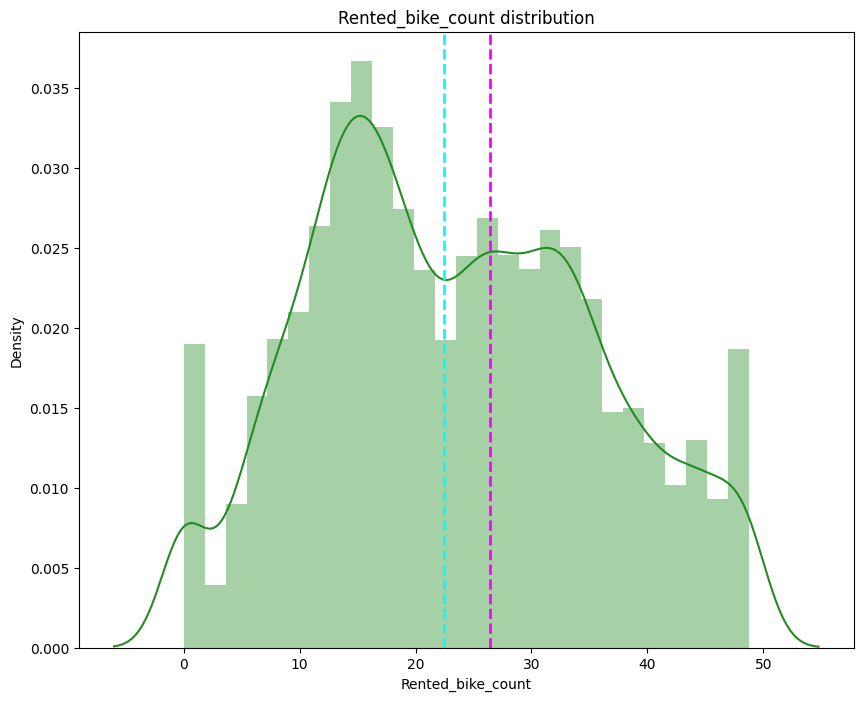

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(np.sqrt(new_df['Rented_bike_count']),color='forestgreen')
plt.xlabel('Rented_bike_count')
plt.title('Rented_bike_count distribution')
plt.axvline(np.sqrt(new_df['Rented_bike_count'].mean()), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(new_df['Rented_bike_count'].median()), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
(np.sqrt(new_df['Rented_bike_count'])).skew()

0.1864036222134771

### 8. Data Splitting

In [ ]:
X = new_df.drop(columns=['Rented_bike_count'], axis=1)
y = np.sqrt(new_df['Rented_bike_count'])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_test.shape)
print(X_test.shape)

(2190, 56)
(2190, 56)


##### What data splitting ratio have you used and why? 

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but I used is 75:25 for training and testing respectively. 

In this step we  split our data into training and testing set using scikit learn library 

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:5]

array([[0.375     , 0.84693878, 0.25      , 0.18149466, 0.        ,
        0.        , 0.04545455, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        ],
       [0.7306338 , 0.47959184, 0.52272727, 0.24758516, 1.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

In [ ]:
X_test[0:5]

array([[0.49647887, 0.74489796, 0.29545455, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.69014085, 0.79591837, 0.22727273, 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.     

##### Which method have you used to scale you data and why?

Scaling helps to standardize the range of features and ensure that each feature (continuous variable) contributes equally to the analysis.
I used Min-Max scaler which scales the data to a fixed range, typically between 0 and 1. It helps us in to normalise the data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### 1-Linear Regression

Linear regression is one of the most basic types of regression in
supervised machine learning. The linear regression model consists of a
predictor variable and a dependent variable related linearly to each
other. We try to find the relationship between independent variable
(input) and a corresponding dependent variable (output).

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

reg.score(X_train, y_train)


0.6284598223176391

In [ ]:
reg.coef_

array([ 2.34378046e+01, -1.26175990e+01, -7.99726634e-01,  1.45659872e+00,
        3.16193632e+00, -5.15302563e+01,  5.52188346e-01, -3.99265539e+00,
        4.33850059e+10, -2.64853187e+11,  8.89651755e+11,  8.53347251e+11,
        8.53347251e+11,  8.53347251e+11,  8.89651755e+11,  8.89651755e+11,
       -2.64853187e+11, -2.64853187e+11, -1.30162027e+12, -1.30162027e+12,
       -1.30162027e+12, -1.27695439e+11, -1.27695439e+11, -8.43104326e+10,
       -8.43104326e+10, -1.27695439e+11, -1.27695439e+11, -1.27695439e+11,
        1.44698556e+10,  1.44698556e+10,  1.44698556e+10,  1.44698556e+10,
        1.44698556e+10,  1.44698556e+10,  1.44698556e+10,  1.44698556e+10,
        1.44698556e+10,  1.44698556e+10,  1.44698556e+10,  1.44698556e+10,
        1.44698556e+10,  1.44698556e+10,  1.44698556e+10,  1.44698556e+10,
        1.44698556e+10,  1.44698556e+10,  1.44698556e+10,  1.44698556e+10,
        1.44698556e+10,  1.44698556e+10,  1.44698556e+10,  1.44698556e+10,
       -5.40457837e+11, -

In [ ]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

LR_train_mse=mean_squared_error(y_train,y_pred_train)
print("MSE:",LR_train_mse)

LR_train_rmse=np.sqrt(LR_train_mse)
print("RMSE:",LR_train_rmse)

LR_train_mae=mean_absolute_error(y_train,y_pred_train)
print("MAE:",LR_train_mae)

from sklearn.metrics import r2_score
LR_train_R2=r2_score(y_train,y_pred_train)
print("R2:",LR_train_R2)
Adjusted_LR_train_R2 = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('adjusted R2:',Adjusted_LR_train_R2)

MSE: 56.060351580577546
RMSE: 7.487346097288247
MAE: 5.255226261656661
R2: 0.6284598223176391
adjusted R2: 0.6187053685200712


In [ ]:
from sklearn.metrics import mean_squared_error

LR_test_mse=mean_squared_error(y_test,y_pred_test)
print("MSE:",LR_test_mse)

LR_test_rmse=np.sqrt(LR_test_mse)
print("RMSE:",LR_test_rmse)

LR_test_mae=mean_absolute_error(y_test,y_pred_test)
print("MAE:",LR_test_mae)

from sklearn.metrics import r2_score
LR_test_R2=r2_score(y_test,y_pred_test)
print("R2:",LR_test_R2)
Adjusted_LR_test_R2 = (1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('adjusted R2:',Adjusted_LR_test_R2)

MSE: 64.28186568067694
RMSE: 8.01759725108944
MAE: 5.45357877633225
R2: 0.5841374414198801
adjusted R2: 0.5732193433043214


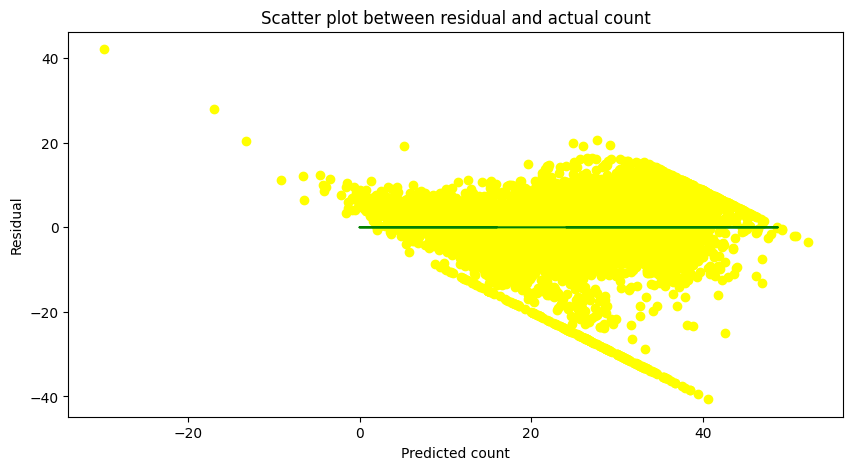

In [ ]:
#checking for heteroscedasticity
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

plt.subplots(figsize=(10,5))
plt.scatter(y_pred_train, residuals_train,c='yellow')
plt.plot(y, [0]*len(y),color='green')
plt.title('Scatter plot between residual and actual count')
plt.xlabel('Predicted count')
plt.ylabel('Residual')
plt.show()

In [ ]:
#mean of residuals
round((np.mean(residuals_train)))

0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

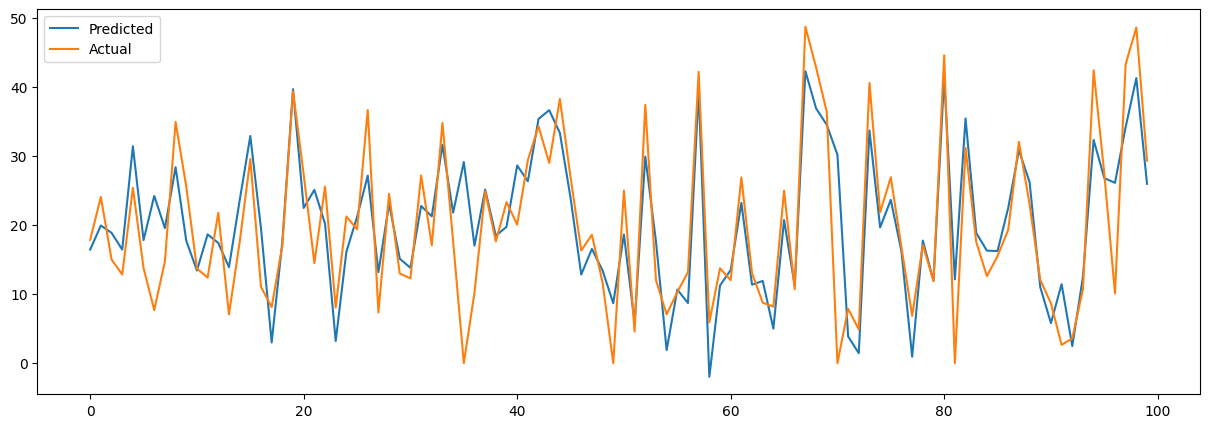

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,5))
plt.plot(y_pred_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

I used simple Linear regression algorithm as first machine learning model.

For training dataset, I found out the following:
* MSE: 56.060321835040796
* RMSE: 7.487344110900794
* MAE: 5.255209533889809
* R2: 0.6284600194562888
* adjusted R2: 0.6188842467618634

Where as for test dataset, I found out the following:
* MSE: 64.28133947686663
* RMSE: 8.017564435467085
* MAE: 5.453501121114831
* R2: 0.5841408456219916
* adjusted R2: 0.5734228261792595

The Mean Squared Error (MSE) is perhaps the simplest and most common loss function and used to check how close estimates or forecasts are to actual values. Lower the MSE, the closer is forecast to actual. This is used as a model evaluation measure for regression models and the lower value indicates a better fit.

RMSE- Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance.

MAE- Mean absolute error refers to the magnitude of difference between the prediction of an observation and the true value of that observation.

R2- The coefficient of determination, or R2 , is a measure that provides information about the goodness of fit of a model. In the context of regression it is a statistical measure of how well the regression line approximates the actual data.

Adjusted R2: It is always lower than R2 as it adjusts for the increasing predictors and only shows improvement if there is a real improvement.

This all are evluation metrics for linear regression model. More the R2 score close to 1 the more accurate our model will be and we got 0.57 in our test dataset that is 57% varaince in Y predictable from X.

#### 2. Cross- Validation & Hyperparameter Tuning

There is no alpha value in Linear regression. We use hyperparameter tuning next 2 algorithms.

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 2- Lasso Regression (L1)

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. It uses L1 regularization technique.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# importing lasso regressor
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)

# Fit the Lasso model
lasso.fit(X_train, y_train)

# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.16572236036339527 0.18018848047826053


In [ ]:
# Predict on the model
# Making predictions on train and test data
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [ ]:
# the metrics for evaluations for train dataset:
lasso_train_mse=mean_squared_error(y_train,y_pred_train_lasso)
print('MSE:',lasso_train_mse)
lasso_train_rmse=np.sqrt(lasso_train_mse)
print('RMSE:',lasso_train_rmse)

lasso_train_mae=mean_absolute_error(y_train,y_pred_train_lasso)
print('MAE:',lasso_train_mae)

#defining the R2 and adjusted R2 score for tain dataset.
lasso_train_r2=r2_score(y_train,y_pred_train_lasso)
print('R2:',lasso_train_r2)

Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE: 123.69839057752638
RMSE: 11.121977817705194
MAE: 8.880241219518913
R2: 0.18018848047826053
Adjusted R2 : 0.15866506505715539


In [ ]:
# the metrics for evaluations for test dataset:
lasso_test_mse=mean_squared_error(y_test,y_pred_test_lasso)
print('MSE:',lasso_test_mse)
lasso_test_rmse=np.sqrt(lasso_test_mse)
print('RMSE:',lasso_test_rmse)

lasso_test_mae=mean_absolute_error(y_test,y_pred_test_lasso)
print('MAE:',lasso_test_mae)

#defining the R2 and adjusted R2 score for test dataset.
lasso_test_r2=r2_score(y_test,y_pred_test_lasso)
print('R2:',lasso_test_r2)

Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE: 128.95828697495088
RMSE: 11.355980229594929
MAE: 9.047409910443575
R2: 0.16572236036339527
Adjusted R2 : 0.14381914994630673


In [ ]:
#checking for heteroscedasticity
residuals_train_lasso = y_train - y_pred_train_lasso
residuals_test_lasso = y_test - y_pred_test_lasso

In [ ]:
round((np.mean(residuals_train_lasso)))

0

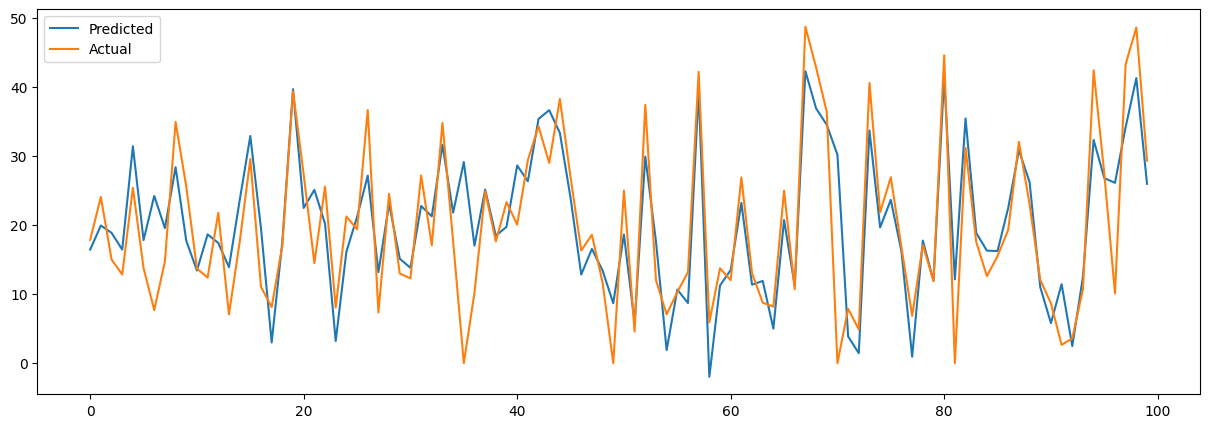

In [ ]:
#Comparing predictions with actual values
plt.figure(figsize=(15,5))
plt.plot(y_pred_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

I implement Lasso regression also called as L1 regularization as 2nd  machine learning algorithm. Again we use same evaluation metric as we did in our first ML model.


For training dataset, I found out the following:
* MSE: 123.69839057752638
* RMSE: 11.121977817705194
* MAE: 8.880241219518913
* R2: 0.18018848047826053
* Adjusted R2 : 0.15866506505715539

For testing dataset, I found out the following:
* MSE: 128.95828697495088
* RMSE: 11.355980229594929
* MAE: 9.047409910443575
* R2: 0.16572236036339527
* Adjusted R2 : 0.14381914994630673

This all are evluation metrics for lasso regression model. 

we got R2 score around 0.14 which is not good result. The more R2 score is close to 1 , the more our model predicted to be accurate.

Let's do some cross validation and hypertuning for better result.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques ( GridSearch CV)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

Using grid search cv for finding out the best parameter i.e alpha value for hyper meter tuning.

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -57.133097909174474


In [ ]:
#making prediction
y_pred_lasso = lasso_regressor.predict(X_test)

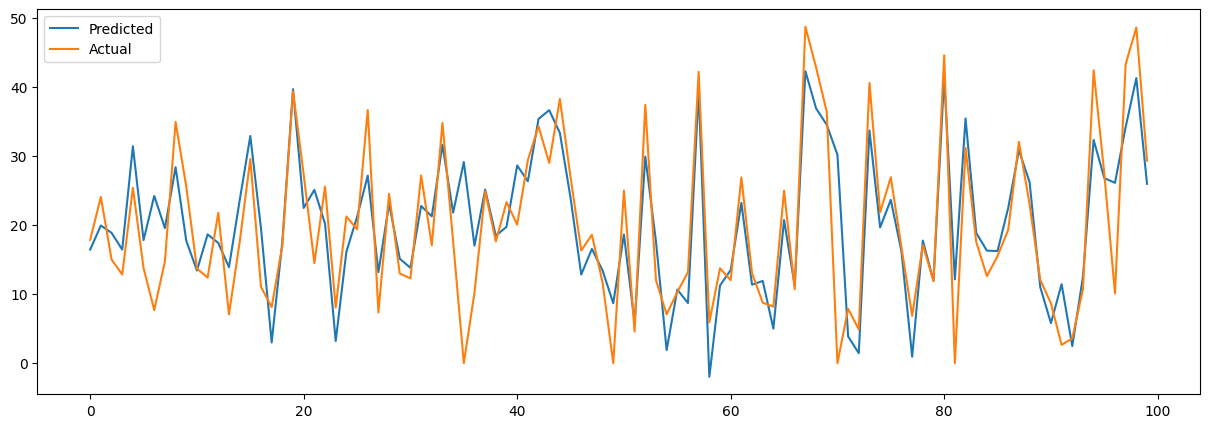

In [ ]:
#Comparing predictions with actual values
plt.figure(figsize=(15,5))
plt.plot(y_pred_test[0:100])
plt.plot(np.array(y_test[0:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 64.29271889403536
RMSE : 8.018274059548935
R2 : 0.5840672280707768
Adjusted R2 :  0.5731472865667747


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.
Instead of doing hit and trial method for finding the best hypermeter we use gridsearchcv.

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yeah, there is clear improvement in R2 score. After tuning the parameters by using gridsearchcv our R2 score improves a lot and it comes around 0.57 from 0.14. 
Now our R2 score is more closer to 1 that concludes more accuracy in our machine learning model.

### ML Model - 3 - Ridge Regression (L2)

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization.

In [ ]:
# importing ridge regressor
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.1)

# Fit the Algorithm
ridge.fit(X_train,y_train)
ridge.score(X_train,y_train)

0.6284560436265956

In [ ]:
# Making predictions on train and test data
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
# the metrics for evaluations for train dataset:
ridge_train_mse=mean_squared_error(y_train,y_pred_train_ridge)
print('MSE:',ridge_train_mse)
ridge_train_rmse=np.sqrt(ridge_train_mse)
print('RMSE:',ridge_train_rmse)

ridge_train_mae=mean_absolute_error(y_train,y_pred_train_ridge)
print('MAE:',ridge_train_mae)

#defining the R2 score for tain dataset.
ridge_train_r2=r2_score(y_train,y_pred_train_ridge)
print('R2:',ridge_train_r2)

#making adjusted R2 score for train dataset.
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

MSE: 56.06092173358155
RMSE: 7.487384171630406
MAE: 5.256243686967788
R2: 0.6284560436265956
Adjusted R2 : 0.6252614387506689


In [ ]:
#defining the metrics for evaluations for test dataset:
ridge_test_mse=mean_squared_error(y_test,y_pred_test_ridge)
print('MSE:',ridge_test_mse)
ridge_test_rmse=np.sqrt(ridge_test_mse)
print('RMSE:',ridge_test_rmse)

ridge_test_mae=mean_absolute_error(y_test,y_pred_test_ridge)
print('MAE:',ridge_test_mae)

#R2 and adjusted R2 score for test dataset:
ridge_test_r2=r2_score(y_test,y_pred_test_ridge)
print('R2:',ridge_test_r2)

Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE: 64.30121573480152
RMSE: 8.018803884296057
MAE: 5.455509126595632
R2: 0.5840122589452941
Adjusted R2 : 0.5730908742762535


In [ ]:
#checking for heteroscedasticity
residuals_train_ridge = y_train - y_pred_train_ridge
residuals_test_ridge = y_test - y_pred_test_ridge

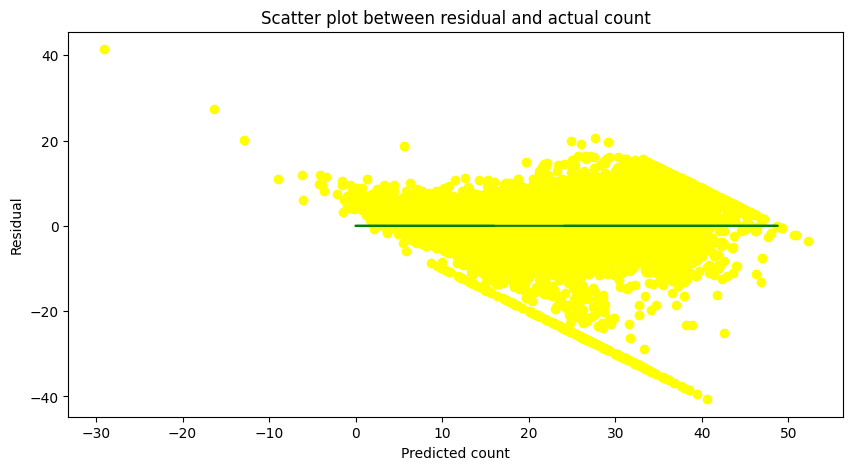

In [ ]:
plt.subplots(figsize=(10,5))
plt.scatter(y_pred_train_ridge, residuals_train_ridge,c='yellow')
plt.plot(y, [0]*len(y),color='green')
plt.title('Scatter plot between residual and actual count')
plt.xlabel('Predicted count')
plt.ylabel('Residual')
plt.show()

In [ ]:
round((np.mean(residuals_train_ridge)))

0

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

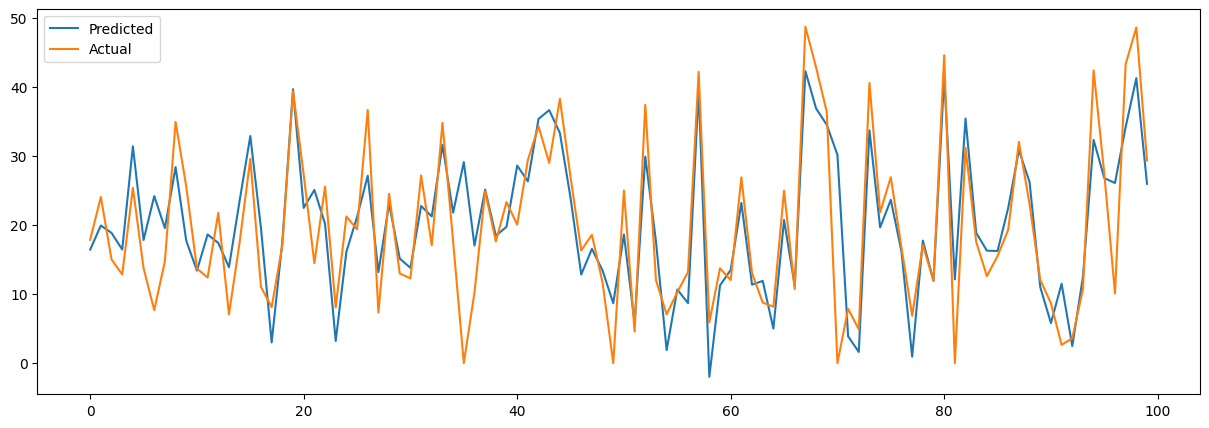

In [ ]:
# Visualizing evaluation Metric Score chart

plt.figure(figsize=(15,5))
plt.plot((y_pred_test_ridge[0:100]))
plt.plot((np.array(y_test[0:100])))
plt.legend(["Predicted","Actual"])
plt.show()

As 3rd machine learning model, I used L2 regularization technique that is Ridge regression. 

For training dataset i found out following:
* MSE: 56.06032593929304
* RMSE: 7.4873443849801005
* MAE: 5.255146935845489
* R2: 0.6284599922553425
* Adjusted R2 : 0.6253229488985792

For testing dataset i found out the following:
* MSE: 64.27907333571898
* RMSE: 8.017423110683318
* MAE: 5.453434824955445
* R2: 0.5841555061058745
* Adjusted R2 : 0.5734378645106651

As from above evaluation metrics you can see that we got R2 score of 0.77 for training dataset and 0.78 for test dataset without any hyperparameter tunning which is already kind of better result for our model.
The R2 score is more closer to 1 , the more your model predictions are going to be accurate.

Let's apply cross validation and hyperparameter tunning in our model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#let's apply gridserachcv method for finding best fit parameter or alpha value.
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#printing the best aplha value given by gridserachcv function.
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -57.137471209778234


In [ ]:
# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
#metrics for model evaluation in ridge regression:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 64.2835310481174
RMSE : 8.017701107432067
R2 : 0.5841266675576495
Adjusted R2 :  0.5732082865840107


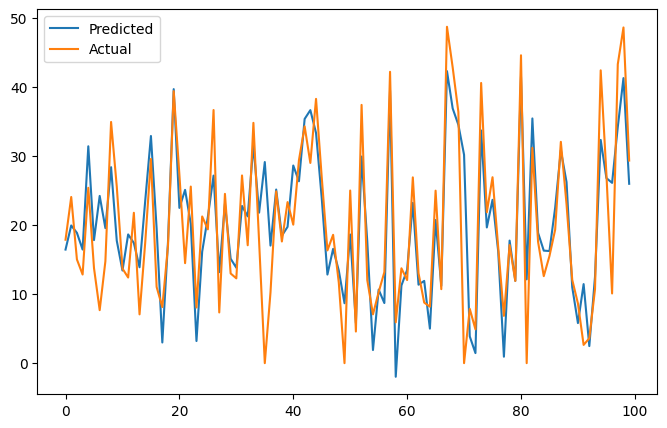

In [ ]:
#Comparing predictions with actual values
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge[0:100]))
plt.plot((np.array(y_test[0:100])))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance. Instead of doing hit and trial method for finding the best hypermeter we use gridsearchcv.

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no slight changes after applying the hyperparameter tuning and cross validation.
* R2 score before cross valdiation and hyperparameter tuning: 0.57
* R2 score after appying cross valdiation and hyperparameter tuning:0.57
which is same.

### Random Forest Classifier

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

In [ ]:
# Create an instance of the RandomForestClassifier

from sklearn.ensemble import RandomForestRegressor
ensemble_regressor = RandomForestRegressor()


In [ ]:
 #Fit the Algorithm
ensemble_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# Predict on the model
# Making predictions on train and test datay_pred_train_rf = ensemble_regressor.predict(X_train)
y_pred_test_rf = ensemble_regressor.predict(X_test)
y_pred_train_rf = ensemble_regressor.predict(X_train)

In [ ]:
# Calculating accuracy on train set.
rf_train_mse=mean_squared_error(y_train,y_pred_train_rf)
print('MSE:',rf_train_mse)
rf_train_rmse=np.sqrt(rf_train_mse)
print('RMSE:',rf_train_rmse)

rf_train_mae=mean_absolute_error(y_train,y_pred_train_rf)
print('MAE:',rf_train_mae)

rf_train_r2=r2_score(y_train,y_pred_train_rf)
print('R2:',rf_train_r2)

Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

MSE: 4.490869988004015
RMSE: 2.119167286460419
MAE: 1.167426108110071
R2: 0.9702367433266424
Adjusted R2 : 0.969980833243162


In [ ]:
# Calculating accuracy on train set.
rf_test_mse=mean_squared_error(y_test,y_pred_test_rf)
print('MSE:',rf_test_mse)
rf_test_rmse=np.sqrt(rf_test_mse)
print('RMSE:',rf_test_rmse)

rf_test_mae=mean_absolute_error(y_test,y_pred_test_rf)
print('MAE:',rf_test_mae)

rf_test_r2=r2_score(y_test,y_pred_test_rf)
print('R2:',rf_test_r2)

Adjusted_R2_l = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE: 40.49472794658352
RMSE: 6.363546805562407
MAE: 3.388275726685774
R2: 0.7380250091600209
Adjusted R2 : 0.7311470909757551


In [ ]:
#checking for heteroscedasticity
residuals_train_rf = y_train - y_pred_train_rf
residuals_test_rf = y_test - y_pred_test_rf

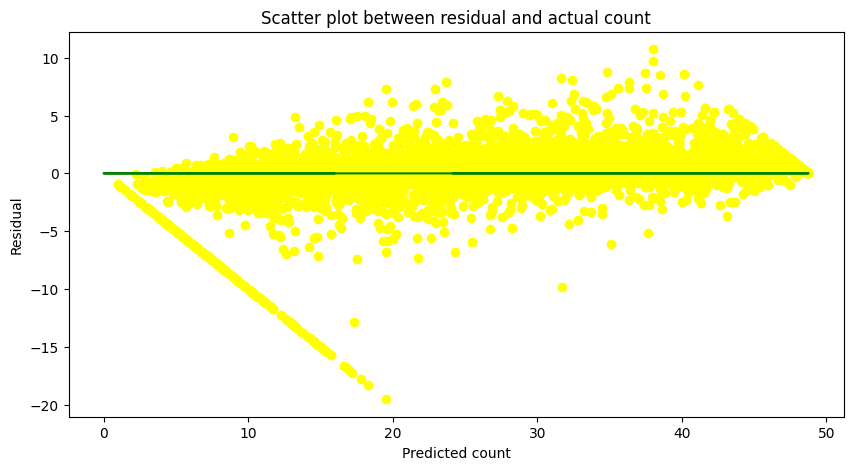

In [ ]:
plt.subplots(figsize=(10,5))
plt.scatter(y_pred_train_rf, residuals_train_rf,c='yellow')
plt.plot(y, [0]*len(y),color='green')
plt.title('Scatter plot between residual and actual count')
plt.xlabel('Predicted count')
plt.ylabel('Residual')
plt.show()

In [ ]:
round((np.mean(residuals_train_rf)))

0

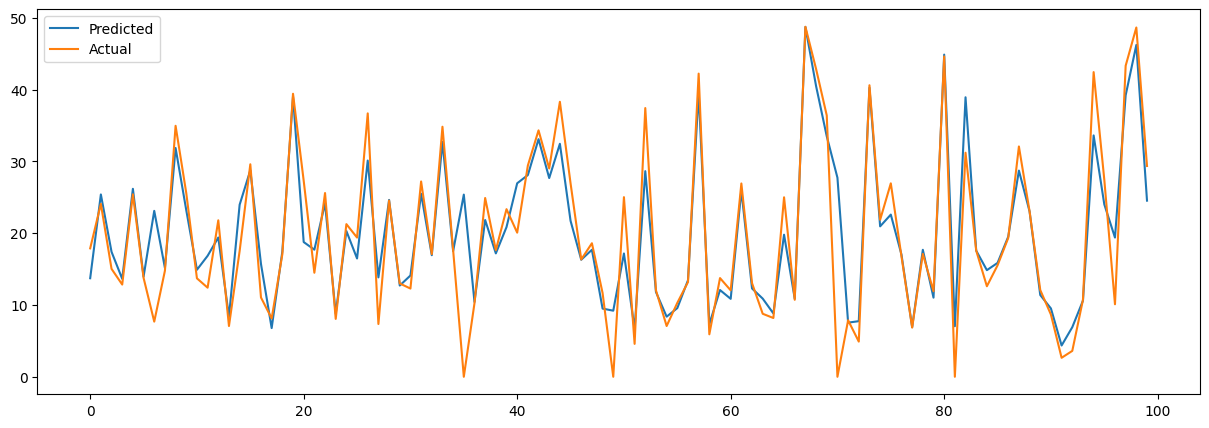

In [ ]:
#Comparing predictions with actual values
plt.figure(figsize=(15,5))
plt.plot((y_pred_test_rf[0:100]))
plt.plot((np.array(y_test[0:100])))
plt.legend(["Predicted","Actual"])
plt.show()

For training dataset i found out following:
* MSE: 4.739914154372811
* RMSE: 2.1771343905172253
* MAE: 1.2209318315423554
* R2: 0.9685862022362888
* Adjusted R2 : 0.9683209644596532

For test dataset i found out following:
* MSE: 42.2607041560889
* RMSE: 6.500823344476367
* MAE: 3.496719679965829
* R2: 0.7266002725395141
* Adjusted R2 : 0.7195538878111511

From above metrics we can clearly see that how well random frorest classifier algorithm performed on our dataset. It capture 70% variance as our R2 score is near 0.7.

Let's apply cross validation and hyperparameter tuning techniques on model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Grid search
from sklearn.ensemble import RandomForestRegressor
rf_cv = RandomForestRegressor(random_state=42)
param_dict = {'n_estimators':[50,80,100],
              'max_depth':[4,6,8],
              'min_samples_split':[50,100,150],
              'min_samples_leaf':[40,50]}
rf_reg = GridSearchCV(rf_cv, param_dict, verbose=1, scoring='neg_mean_squared_error', cv=5)
rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
rf_reg_best_est=rf_reg.best_estimator_
print(f'The best estimator values : {rf_reg_best_est}')

The best estimator values : RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=80, random_state=42)


In [ ]:
# best fit values
rf_reg_best_params=rf_reg.best_params_
print(f'The best fit values: {rf_reg_best_params}')

The best fit values: {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 80}


In [ ]:
rf_reg_score=rf_reg.best_score_
print(f" The negative mean squared error is: {rf_reg_score}")

 The negative mean squared error is: -58.33571970559497


In [ ]:
# Predicting results for train set
y_train_pred=rf_reg.predict(X_train)
y_test_pred=rf_reg.predict(X_test)

In [ ]:
rf_train_mse=mean_squared_error(y_train,y_train_pred)
print('MSE:',rf_train_mse)
rf_train_rmse=np.sqrt(rf_train_mse)
print('RMSE:',rf_train_rmse)

rf_train_mae=mean_absolute_error(y_train,y_train_pred)
print('MAE:',rf_train_mae)

rf_train_r2=r2_score(y_train,y_train_pred)
print('R2:',rf_train_r2)

Adjusted_R2_l = (1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_train_pred))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )

MSE: 52.12261526111255
RMSE: 7.219599383699386
MAE: 4.94620098174867
R2: 0.6545571836532605
Adjusted R2 : 0.6515870012925331


In [ ]:
# Predicting results for test set
rf_test_mse=mean_squared_error(y_test,y_test_pred)
print('MSE:',rf_test_mse)
rf_test_rmse=np.sqrt(rf_test_mse)
print('RMSE:',rf_test_rmse)

rf_test_mae=mean_absolute_error(y_test,y_test_pred)
print('MAE:',rf_test_mae)

MSE: 63.691733826936414
RMSE: 7.980710107937539
MAE: 5.3942404205819665


In [ ]:
rf_testr2=r2_score(y_test,y_test_pred)
print('R2:',rf_testr2)

Adjusted_R2_l = (1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

R2: 0.5879552170864306
Adjusted R2 : 0.5771373512434115


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance. Instead of doing hit and trial method for finding the best hypermeter we use gridsearchcv.

Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

We got following for training dataset:
* MSE: 52.29924946937519
* RMSE: 7.231822002052815
* MAE: 4.959074771210912
* R2: 0.6533865398154609
* Adjusted R2 : 0.650459960093301

For test dataset i found out following:
* MSE: 63.84935045360341
* RMSE: 7.990578855978045
* MAE: 5.398503832161154
* R2: 0.5869355383178319
* Adjusted R2 :  0.5762895470373637


After applying the gridserchcv which is both cross validation and hyperparameter tuning technique, we get sightly less R2 score as it make our model prediction more realistic and avoid some kind of overfiiting.
Previously our model was succesfully capturing the 70% of variance but after applying the gridsearch cv our model capturing 57% of variance which looks more accurate and realistic.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

As it is simple regression problem, I would like to go with Adjusted R2 score which describe the how much the proportion of the variance in the dependent variable that is predictable from the independent variable(s). R2 score is a metric that tells the performance of your model.

**What is a good R2 score in machine learning?**

If the value of the r squared score is 1, it means that the model is perfect and if its value is 0, it means that the model will perform badly on an unseen dataset. This also implies that the closer the value of the r squared score is to 1, the more perfectly the model is trained.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
# import module
from tabulate import tabulate


# Assign data
mydata = [
    ['Linear regression',"64.28133947686663", "8.017564435467085",'0.5841408456219916','0.5734228261792595'],
    ['Lasso (L1)',"64.25330858848494", "8.015816152363085", ' 0.5843221875422712','0.573608841860371'],
    ['Ridge (L2)',"64.1733537176787", "8.010827280479756", '0.5848394444201224','0.5741394301010534'],
    ['Random Forest Classifier',"63.84935045360341", "7.990578855978045", '0.5869355383178319','0.5762895470373637']
]
 
# Create header for table
head = ['ML Model Name',"MSE", "RMSE",'R-squared','Ad. R-squared']
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))
print('Note : Highest evaluation metric are taken into consideration between train_test_split and cross validation from each model')

+--------------------------+---------+---------+-------------+-----------------+
| ML Model Name            |     MSE |    RMSE |   R-squared |   Ad. R-squared |
+==========================+=========+=========+=============+=================+
| Linear regression        | 64.2813 | 8.01756 |    0.584141 |        0.573423 |
+--------------------------+---------+---------+-------------+-----------------+
| Lasso (L1)               | 64.2533 | 8.01582 |    0.584322 |        0.573609 |
+--------------------------+---------+---------+-------------+-----------------+
| Ridge (L2)               | 64.1734 | 8.01083 |    0.584839 |        0.574139 |
+--------------------------+---------+---------+-------------+-----------------+
| Random Forest Classifier | 63.8494 | 7.99058 |    0.586936 |        0.57629  |
+--------------------------+---------+---------+-------------+-----------------+
Note : Highest evaluation metric are taken into consideration between train_test_split and cross validation f

From above chart we get similar value in all of our modelsin test dataset. 
But I have choosen Random Forest Clasifier model because it has more parameters in comparison to linear models and even though they have liitle lesser R2 value than Linear models but overall they have better average accuracy than Linear models.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
features = [i for i in new_df.columns if i not in ['Rented_bike_count']]
def feature_importance(model):
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = X
  indices = np.argsort(importance)
  indices = indices[::-1]
  #plotting
  plt.figure(figsize=(12,4))
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.xticks(rotation = 90)
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

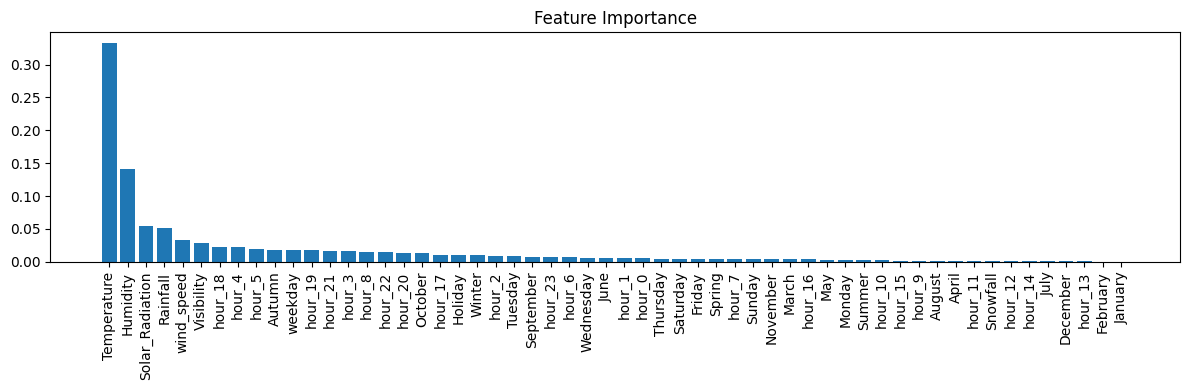

In [ ]:
feature_importance(ensemble_regressor)

We can use the Random Forest algorithm for feature importance implemented in scikit-learn as the RandomForestRegressor and RandomForestClassifier classes.

After being fit, the model provides a **feature_importances_ property** that can be accessed to retrieve the relative importance scores for each input feature.

This approach can also be used with the bagging and extra trees algorithms.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After performing every steps like data wrangling , EDA , data cleaning, data preprocessing, scaling and splitting of data and implementing some basic linear regression models on our dataset.

The following observations were made after analyzing the data :

* General trend is as the temperature increases number of bike rentals also increases.
* Bike rental count decreases with increase in Humidity.
* Bike Rentals are fairly invariable of Wind speed but a faint increase can be seen in the trendline.
* Bike Rentals mildly increases with increase in Visibility
* Sharp increase can be noted with increase in Dew Point temperature.
* On an average, Rented bike counts increases with increase in Solar Radiation.
* Decline in Bike Rentals is seen with increase in Rainfall.
* Decline in Bike Rentals is seen with increase in Snowfall.
* Least Rentals were observed in the month of December, January and February i.e. during winter seasons.
* Highest Rentals were observed during the months of May, June, July i.e. during summer.
* Sudden spike is seen between 7-9 AM and 5-7 PM. This is due to the office goers and students.
* Rentals after midnight are more on weekends than weekdays.
* Rentals during day is more on weekdays than weekends and sudden jump is also not witnessed during weekends.
* Peak hours remain to be the same irrespective of the seasons.
* Winters have least numbers of rentals followed by Spring, Autumn and Summer respectively.
* Demand after 6 PM is marginally high during winters than other seasons.
* Rented Bikes count is way more on working days than on Holidays. This might due to the usage of Rental Bikes for commuting to office.

**All of our ML models capable to capture 60% variance in  test dataset.**

**After applying our regression models and Random forest classifier we found out around 60% variance capture for test dataset and we also find out the most important features in our model.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***